[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-02-store-input)

## 상가(상권)정보 분석하기

- 데이터 출처 : [공공데이터포털](https://www.data.go.kr/dataset/15012005/fileData.do)
- 소상공인 상권정보 상가업소 데이터
- 영상에 사용한 데이터셋 다운로드 : http://bit.ly/open-data-set-folder

### 데이터셋을 엑셀에서 열어보는 방법

```
MS엑셀(Excel)에서 UTF-8로 된 CSV파일 불러오기
 ◦  기존 euc-kr 데이터 추출형식으로 인해 업소명 오류가 발견되었으며 이를 개선하고자 UTF-8 형식으로 추출하였습니다.
 ◦ 개발자가 아닌 일반사용자의 경우 euc-kr(UTF-8 이나 UTF-16)이 아닌 CSV파일을 엑셀에서 바로 열면 한글이 모두 깨지게 됩니다.

 ◦ 바로 열지 마시고 다음 절차를 거치시기 바랍니다.
   - 엑셀을 실행하고 데이터 → 텍스트를 선택합니다.
   - 가져올 파일을 선택하고 확인을 클릭합니다.
   - 콤보 박스에서 적절한 코드 타입이 선택됐는지 확인합니다.
     * UTF-8의 코드 페이지 넘버는 65001입니다.

   - 원본 데이터 파일 유형을 ‘구분 기호로 분리됨’ 선택합니다.
   - 기타 ‘|’(파이프) 입력, 3단계 텍스트로 선택합니다.
     * 단, 지번코드, 건물관리번호, 신우편번호, 경도, 위도 등 행마다 텍스트 선택

```

### 데이터셋 분류 지역

- 이 튜토리얼에서는 1번 파일만 사용합니다.

```
※ 파일데이터 분류 지역
1 : 서울, 부산
2 : 대구, 인천, 광주, 대전, 울산
3 : 경기, 강원, 충북
4 : 충남, 전북, 전남, 경북, 경남, 제주
```


## 라이브러리 로드


In [197]:
# 라이브러리를 로드합니다.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 한글폰트 설정


In [198]:
# 폰트 설정이 잘 안 된다면 해당 셀의 마지막 줄 주석을 풀고 실행해 보세요.
# colab 사용시에도 아래 함수를 활용해 보세요.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "AppleGothic"
    return font_family

# plt.rc("font", family=get_font_family())

<Axes: title={'center': '한글폰트설정'}>

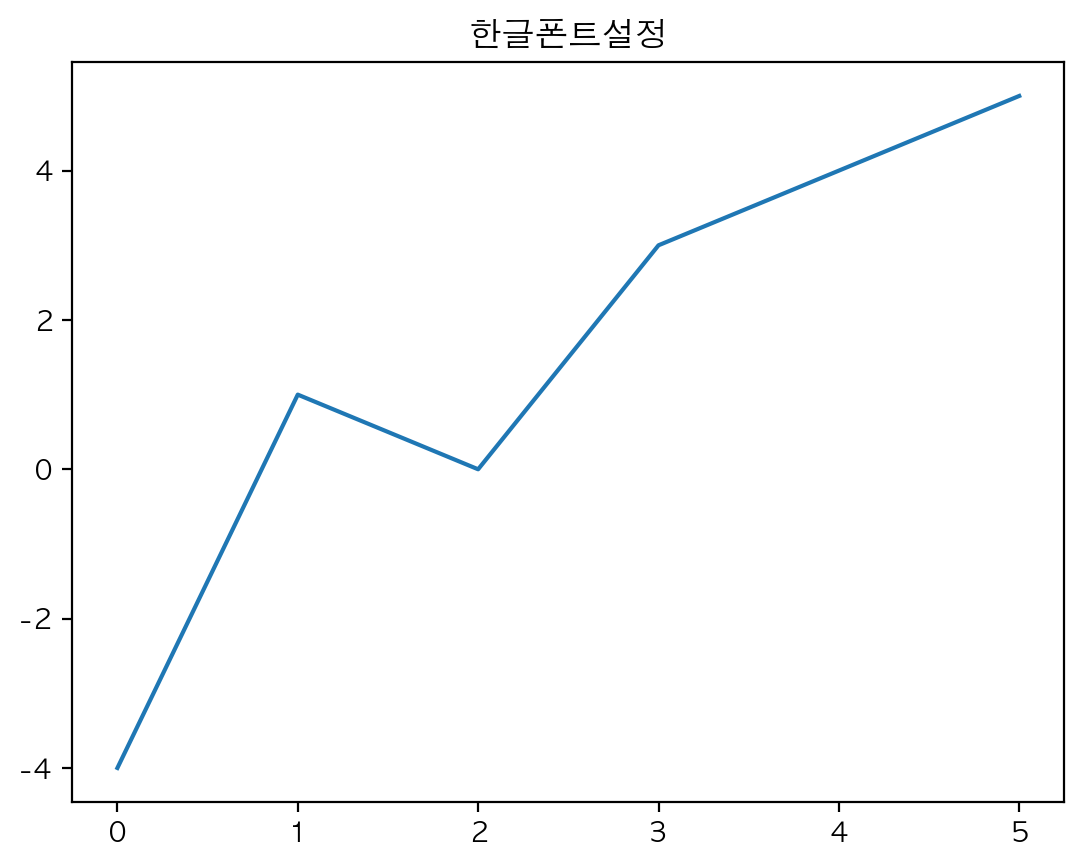

In [199]:
# 한글폰트를 설정합니다.
plt.rc('font',family='AppleGothic')
plt.rc('axes',unicode_minus=False)
pd.Series([-4,1,0,3,4,5]).plot(title='한글폰트설정')

In [200]:
# 레티나 디스플레이로 폰트가 선명하게 표시되도록 합니다.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

### 한글폰트 설정 확인


<Axes: title={'center': '한글폰트설정'}>

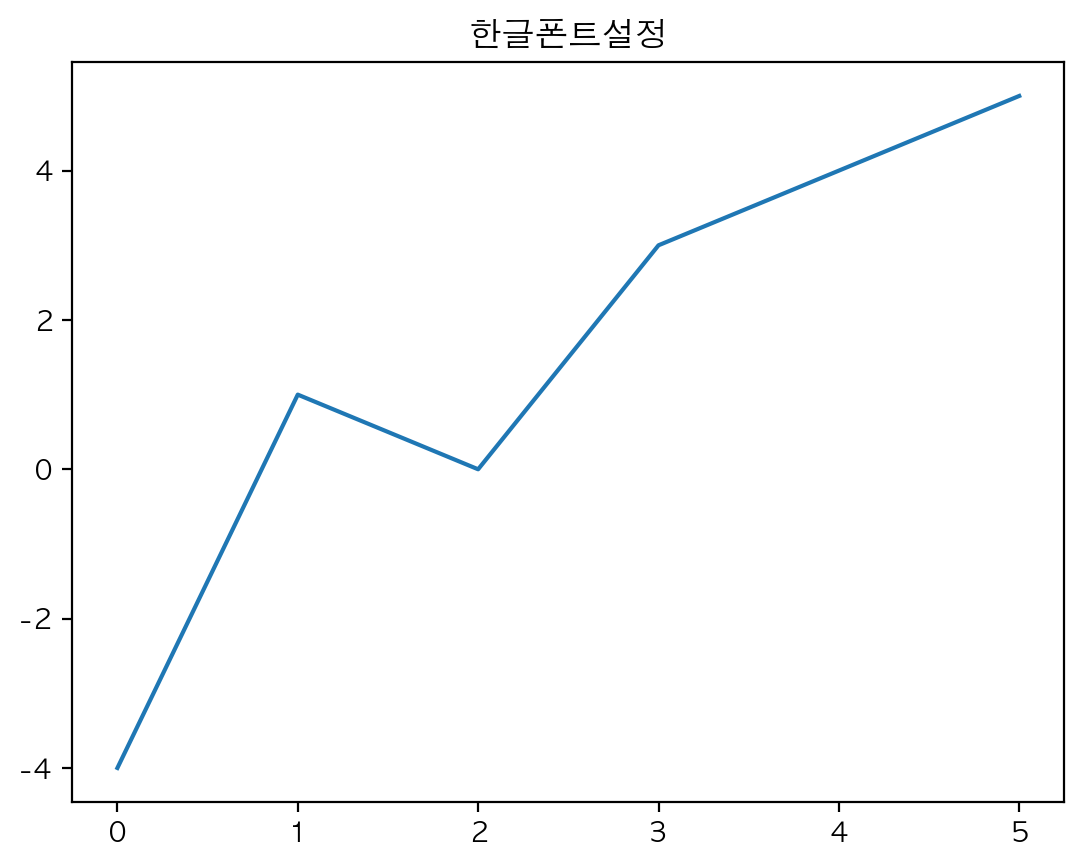

In [201]:
pd.Series([-4,1,0,3,4,5]).plot(title='한글폰트설정')

## 파일로드


In [202]:
%ls data/

seoul_municipalities_geo_simple.json*
상가업소정보_201912_01.csv*
소상공인시장진흥공단_상가(상권)정보_서울_202406.csv*


In [203]:
# 파일을 로드합니다.
df = pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_서울_202406.csv',low_memory=False)
df.shape


(460437, 39)

In [204]:
# 모든 컬럼이 표시되도록 max_columns 의 수를 지정합니다.
pd.options.display.max_columns = 39


## 미리보기

### head, tail


In [205]:
# head 로 미리보기를 합니다.
df.head()

상가업소번호        상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
0  MA0101202210A0037544     영자's곱창  NaN        I2       음식      I201       한식   
1  MA0101202210A0097916      호텔클로이  NaN        I1       숙박      I101    일반 숙박   
2  MA0101202210A0096343  나라차중계태권도장  NaN        P1       교육      P106    기타 교육   
3  MA0101202210A0093845      이상한스냅  NaN        M1    과학·기술      M113    사진 촬영   
4  MA010120220805430767        토끼정  NaN        I2       음식      I201       한식   

  상권업종소분류코드  상권업종소분류명 표준산업분류코드        표준산업분류명  시도코드    시도명  시군구코드 시군구명  \
0    I20109  곱창 전골/구이   I56111     한식 일반 음식점업    11  서울특별시  11215  광진구   
1    I10102     여관/모텔   I55102            여관업    11  서울특별시  11140   중구   
2    P10601  태권도/무술학원   P85611  태권도 및 무술 교육기관    11  서울특별시  11350  노원구   
3    M11301     사진촬영업   M73303         사진 처리업    11  서울특별시  11470  양천구   
4    I20101    백반/한정식   I56111     한식 일반 음식점업    11  서울특별시  11500  강서구   

      행정동코드  행정동명       법정동코드   법정동명                 지번코드  대지구분코드 대지구분명  \
0  11215760  중곡3동  1121510100    중곡동  1121510100101690021       1    대지   
1  11140590   광희동  1114014500  광희동1가  1114014500101300000       1    대지   
2  11350619  중계본동  1135010600    중계동  1135010600103640019       1    대지   
3  11470600  신월5동  1147010300    신월동  1147010300100090004       1    대지   
4  11500603  가양1동  1150010500    마곡동  1150010500107740012       1    대지   

   지번본번지  지번부번지                  지번주소         도로명코드              도로명  건물본번지  \
0    169   21.0  서울특별시 광진구 중곡동 169-21  1.121530e+11    서울특별시 광진구 면목로  172.0   
1    130    NaN    서울특별시 중구 광희동1가 130  1.114041e+11  서울특별시 중구 을지로42길   11.0   
2    364   19.0  서울특별시 노원구 중계동 364-19  1.135031e+11  서울특별시 노원구 한글비석로  242.0   
3      9    4.0     서울특별시 양천구 신월동 9-4  1.147030e+11    서울특별시 양천구 월정로  283.0   
4    774   12.0  서울특별시 강서구 마곡동 774-12  1.150032e+11   서울특별시 강서구 마곡동로   55.0   

   건물부번지                     건물관리번호    건물명                도로명주소   구우편번호  \
0    NaN  1121510100101690021003140    NaN    서울특별시 광진구 면목로 172  143900   
1    NaN  1114014500101300000014092    유성장   서울특별시 중구 을지로42길 11  100411   
2    NaN  1135010600103640019010971  삼부프라자  서울특별시 노원구 한글비석로 242  139861   
3    NaN  1147010300100090004000001   백송주택    서울특별시 양천구 월정로 283  158822   
4    NaN  1150010500107740012000001  마커스빌딩    서울특별시 강서구 마곡동로 55  157805   

   신우편번호  동정보  층정보  호정보          경도         위도  
0   4904  NaN    1  NaN  127.082832  37.568503  
1   4561  NaN  NaN  NaN  127.005849  37.565708  
2   1734  NaN  NaN  NaN  127.076956  37.649226  
3   7902  NaN  NaN  NaN  126.828832  37.542117  
4   7802  NaN    2  NaN  126.833022  37.560053

In [206]:
# tail 로 미리보기를 합니다.
df.tail()


상가업소번호          상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
460432  MA0101202310A0038359  마스터부동산중개사무소  NaN        L1      부동산      L102   
460433  MA0101202310A0035270   그릿뷰티아카데미학원  NaN        P1       교육      P106   
460434  MA0101202310A0078533        최지원렌탈  NaN        S2    수리·개인      S205   
460435  MA0101202310A0059884      매직노래연습장  NaN        R1   예술·스포츠      R104   
460436  MA0101202310A0062853          곱창꾼  NaN        I2       음식      I201   

       상권업종중분류명 상권업종소분류코드       상권업종소분류명 표준산업분류코드          표준산업분류명  시도코드  \
460432  부동산 서비스    L10203     부동산 중개/대리업   L68221     부동산 중개 및 대리업    11   
460433    기타 교육    P10625  기타 기술/직업 훈련학원   P85669  기타 기술 및 직업 훈련학원    11   
460434  가전제품 수리    S20501       가전제품 수리업   S95310         가전제품 수리업    11   
460435   유원지·오락    R10407            노래방   R91223       노래 연습장 운영업    11   
460436       한식    I20109       곱창 전골/구이   I56111       한식 일반 음식점업    11   

          시도명  시군구코드 시군구명     행정동코드    행정동명       법정동코드 법정동명  \
460432  서울특별시  11500  강서구  11500603    가양1동  1150010500  마곡동   
460433  서울특별시  11260  중랑구  11260575  면목3.8동  1126010100  면목동   
460434  서울특별시  11545  금천구  11545630    독산3동  1154510200  독산동   
460435  서울특별시  11530  구로구  11530550    구로4동  1153010200  구로동   
460436  서울특별시  11545  금천구  11545690    시흥3동  1154510300  시흥동   

                       지번코드  대지구분코드 대지구분명  지번본번지  지번부번지  \
460432  1150010500107970001       1    대지    797    1.0   
460433  1126010100104720005       1    대지    472    5.0   
460434  1154510200111440000       1    대지   1144    NaN   
460435  1153010200101390124       1    대지    139  124.0   
460436  1154510300109540004       1    대지    954    4.0   

                         지번주소         도로명코드                 도로명  건물본번지  건물부번지  \
460432    서울특별시 강서구 마곡동 797-1  1.150020e+11      서울특별시 강서구 공항대로  247.0    NaN   
460433    서울특별시 중랑구 면목동 472-5  1.126030e+11      서울특별시 중랑구 사가정로  409.0    NaN   
460434     서울특별시 금천구 독산동 1144  1.154542e+11  서울특별시 금천구 시흥대로150길    6.0    NaN   
460435  서울특별시 구로구 구로동 139-124  1.153031e+11     서울특별시 구로구 구로중앙로   23.0    NaN   
460436    서울특별시 금천구 시흥동 954-4  1.154542e+11   서울특별시 금천구 시흥대로26길   11.0    7.0   

                           건물관리번호       건물명                   도로명주소   구우편번호  \
460432  1150010500107970001000001    퀸즈파크나인      서울특별시 강서구 공항대로 247  157805   
460433  1126010100104720005000033      대도빌딩      서울특별시 중랑구 사가정로 409  131813   
460434  1154510200109660001000001  한양수자인아파트    서울특별시 금천구 시흥대로150길 6  153013   
460435  1153010200101390124016658       NaN      서울특별시 구로구 구로중앙로 23  152846   
460436  1154510300109540004016744       NaN  서울특별시 금천구 시흥대로26길 11-7  153861   

        신우편번호  동정보  층정보  호정보          경도         위도  
460432   7803  NaN  NaN  NaN  126.834810  37.559341  
460433   2214  NaN    1  NaN  127.090213  37.580598  
460434   8540  NaN    2  NaN  126.899154  37.475441  
460435   8312  NaN    지  NaN  126.891074  37.492071  
460436   8652  NaN    1  NaN  126.904333  37.442069

### 인덱스 정보 보기


In [207]:
df.index

RangeIndex(start=0, stop=460437, step=1)

### 컬럼명만 보기


In [208]:
# 컬럼값만 보기
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### info


In [209]:
# info 로 데이터프레임의 정보보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460437 entries, 0 to 460436
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     460437 non-null  object 
 1   상호명        460437 non-null  object 
 2   지점명        9092 non-null    object 
 3   상권업종대분류코드  460437 non-null  object 
 4   상권업종대분류명   460437 non-null  object 
 5   상권업종중분류코드  460437 non-null  object 
 6   상권업종중분류명   460437 non-null  object 
 7   상권업종소분류코드  460437 non-null  object 
 8   상권업종소분류명   460437 non-null  object 
 9   표준산업분류코드   460346 non-null  object 
 10  표준산업분류명    460346 non-null  object 
 11  시도코드       460437 non-null  int64  
 12  시도명        460437 non-null  object 
 13  시군구코드      460437 non-null  int64  
 14  시군구명       460437 non-null  object 
 15  행정동코드      460437 non-null  int64  
 16  행정동명       460437 non-null  object 
 17  법정동코드      460437 non-null  int64  
 18  법정동명       460437 non-null  object 
 19  지번코드       460437 non-n

### 데이터 타입 보기


In [210]:
df.dtypes

상가업소번호        object
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지        float64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호          int64
동정보          float64
층정보           object
호정보          float64
경도           float64
위도           float64
dtype: object

## 결측치 확인하기


In [211]:
df.isnull().sum()

상가업소번호            0
상호명               0
지점명          451345
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드         91
표준산업분류명          91
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         75547
지번주소              0
도로명코드            29
도로명               0
건물본번지            30
건물부번지        399916
건물관리번호           30
건물명          240972
도로명주소             0
구우편번호             0
신우편번호             0
동정보          460437
층정보          142577
호정보          460437
경도                0
위도                0
dtype: int64

In [212]:
# 결측치를 구해서 n 이라는 변수에 담고 재사용 합니다.
n = df.isnull().sum()

### 결측치 시각화


<Axes: >

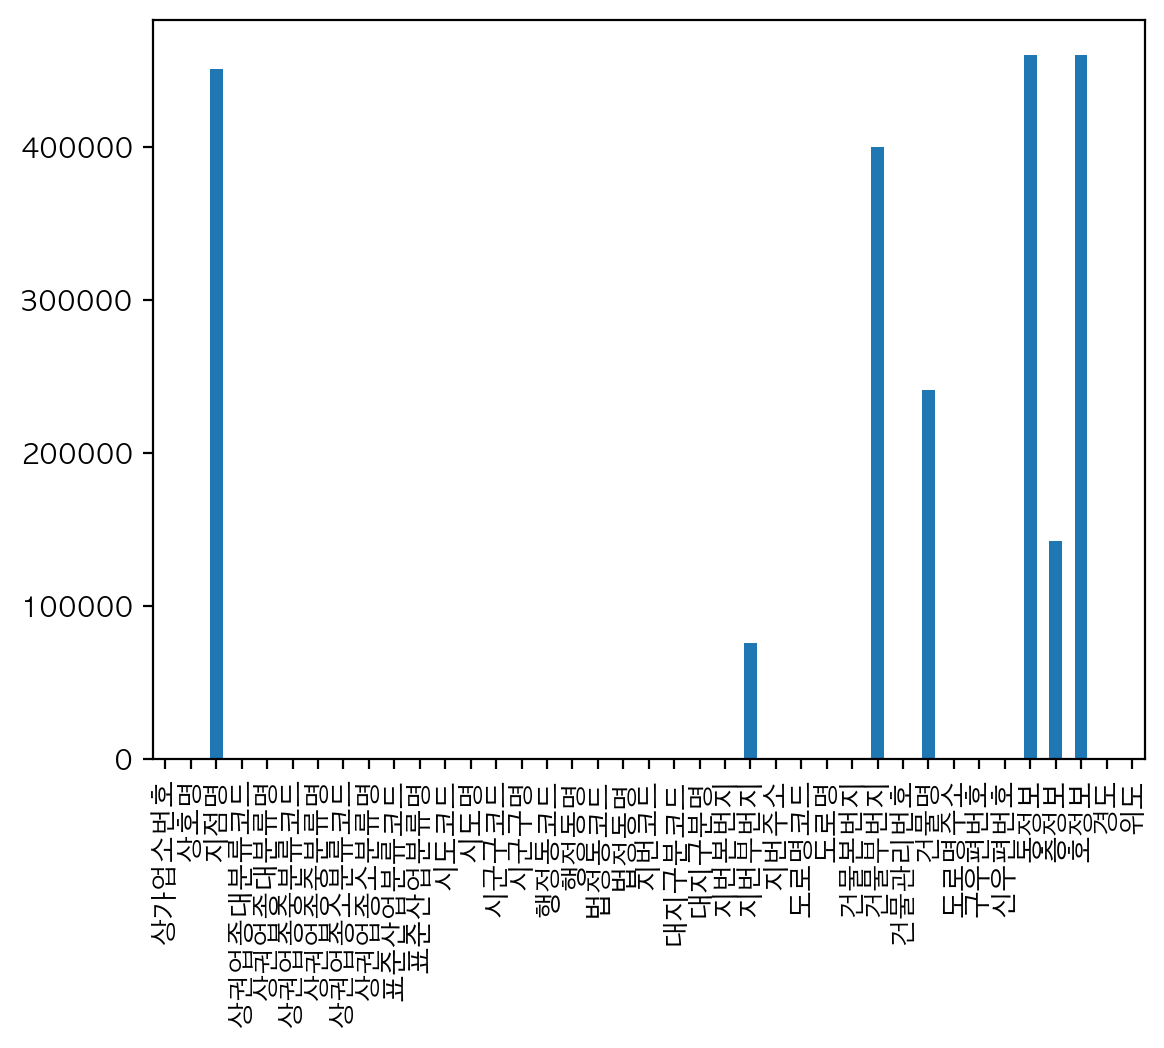

In [213]:
# 막대그래프로 시각화 합니다.
n.plot.bar()

<Axes: >

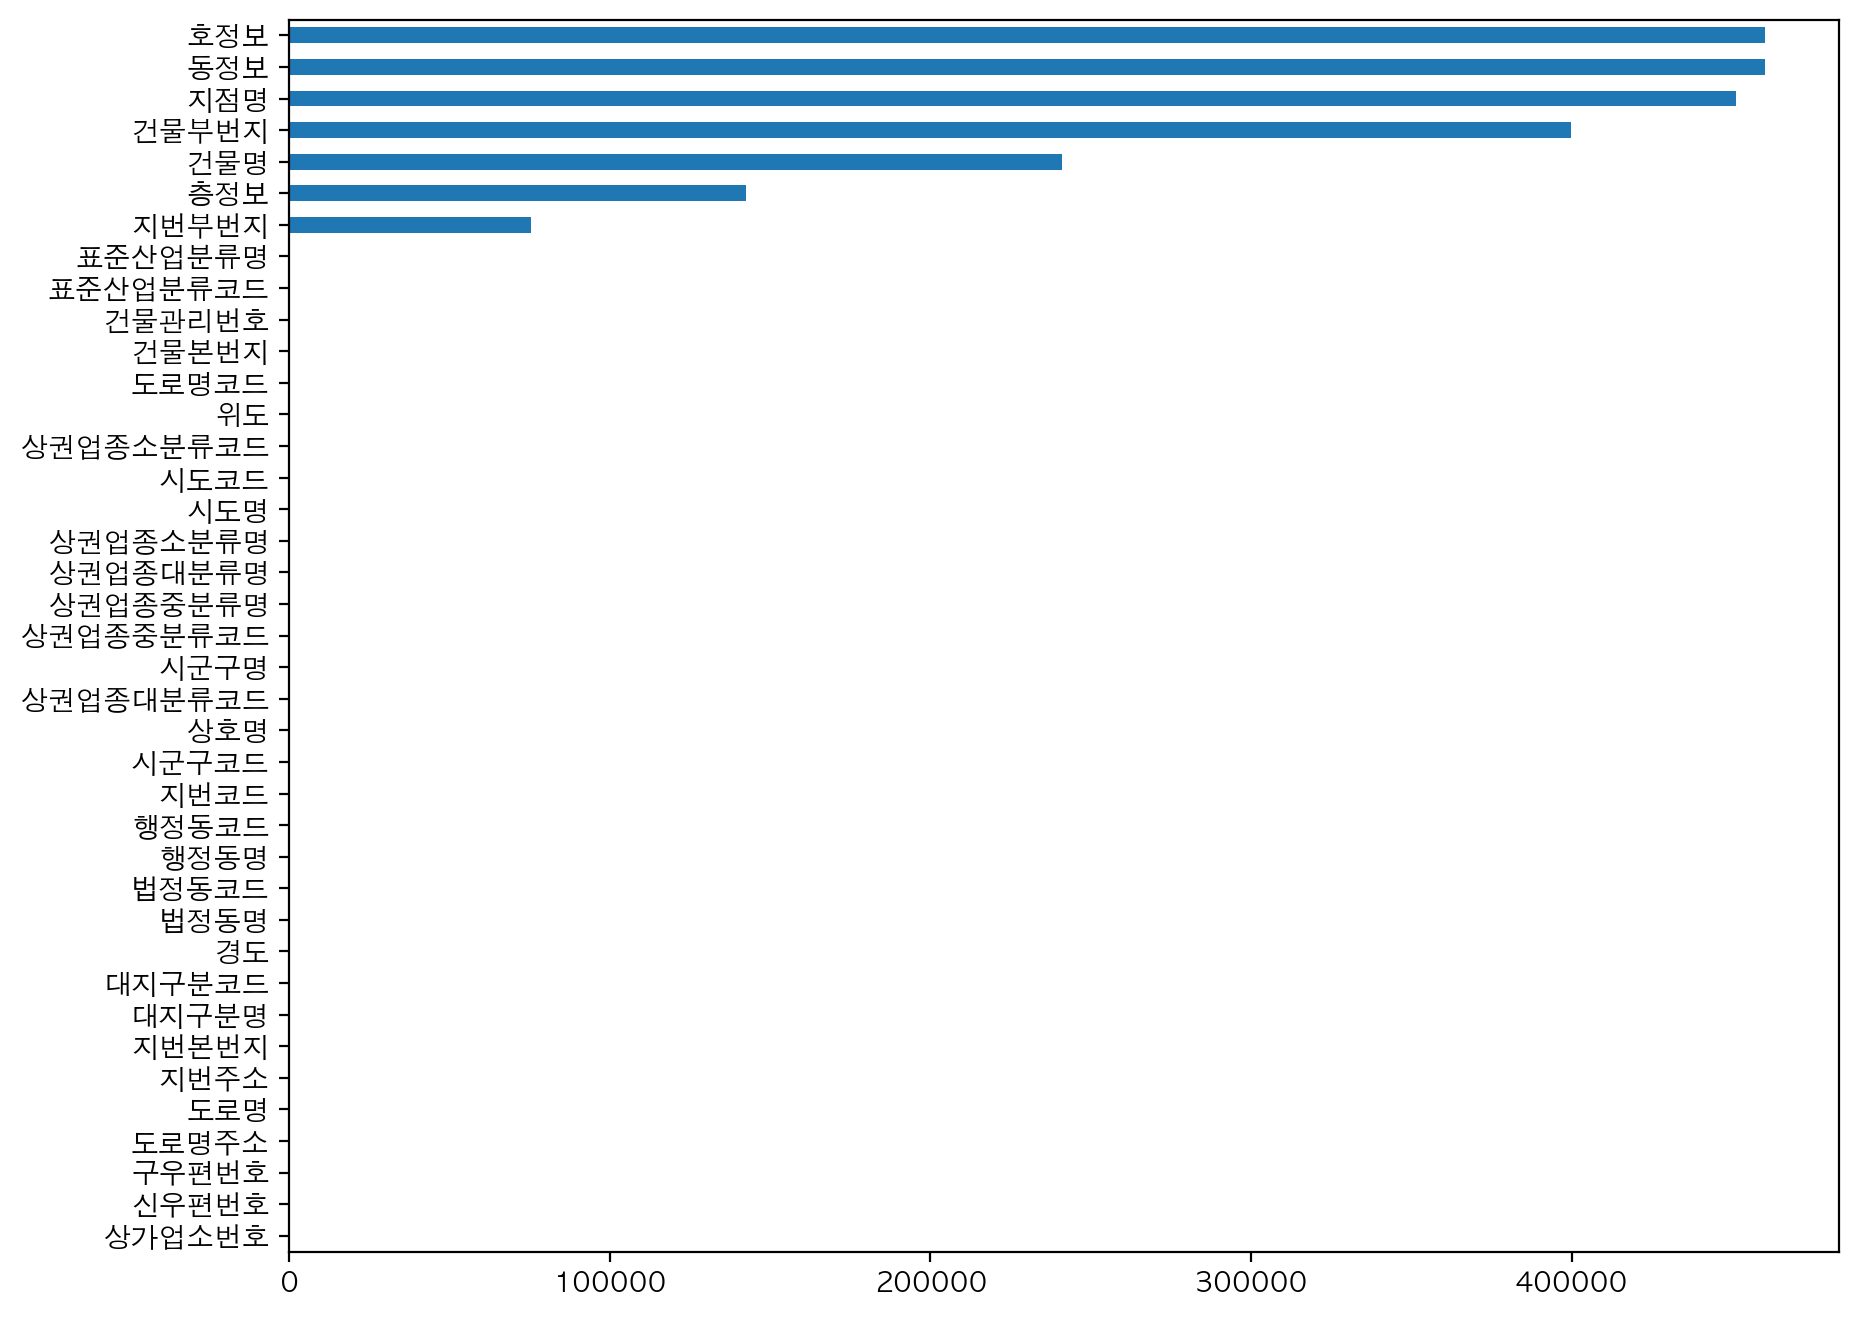

In [214]:
# 값을 정렬해서 결측치가 많은 값이 위에 그려지도록 barh로 그립니다.
n.sort_values().plot.barh(figsize=(10,8))


### missingno 로 결측치 시각화 하기

- 별도의 설치가 필요한 라이브러리 입니다. 아나콘다를 설치하게 되면 자주 사용되는 패키지와 라이브러리가 함께 설치 됩니다. 아나콘다를 사용하지 않는다면 이런 라이브러리를 따로 설치하고 의존성있는 버전을 일일이 맞춰주어야 합니다. 아나콘다는 기본적으로 자주 사용되는 판다스, 넘파이, 사이킷런, 맷플롯립 등의 라이브러리를 내장하고 있습니다. 이에 비해 missingno, folium 등의 라이브러리는 아나콘다에 포함되어 있지 않습니다. 그래서 따로 설치를 해서 사용합니다.
- [ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)
- <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.

- 윈도우
  - <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
- 맥

  - terminal 프로그램을 열어 설치해 주세요.

- 아나콘다에서 설치(다음 3가지 중 하나의 명령어를 사용)
  - conda install -c conda-forge missingno
  - conda install -c conda-forge/label/gcc7 missingno
  - conda install -c conda-forge/label/cf201901 missingno


<Axes: >

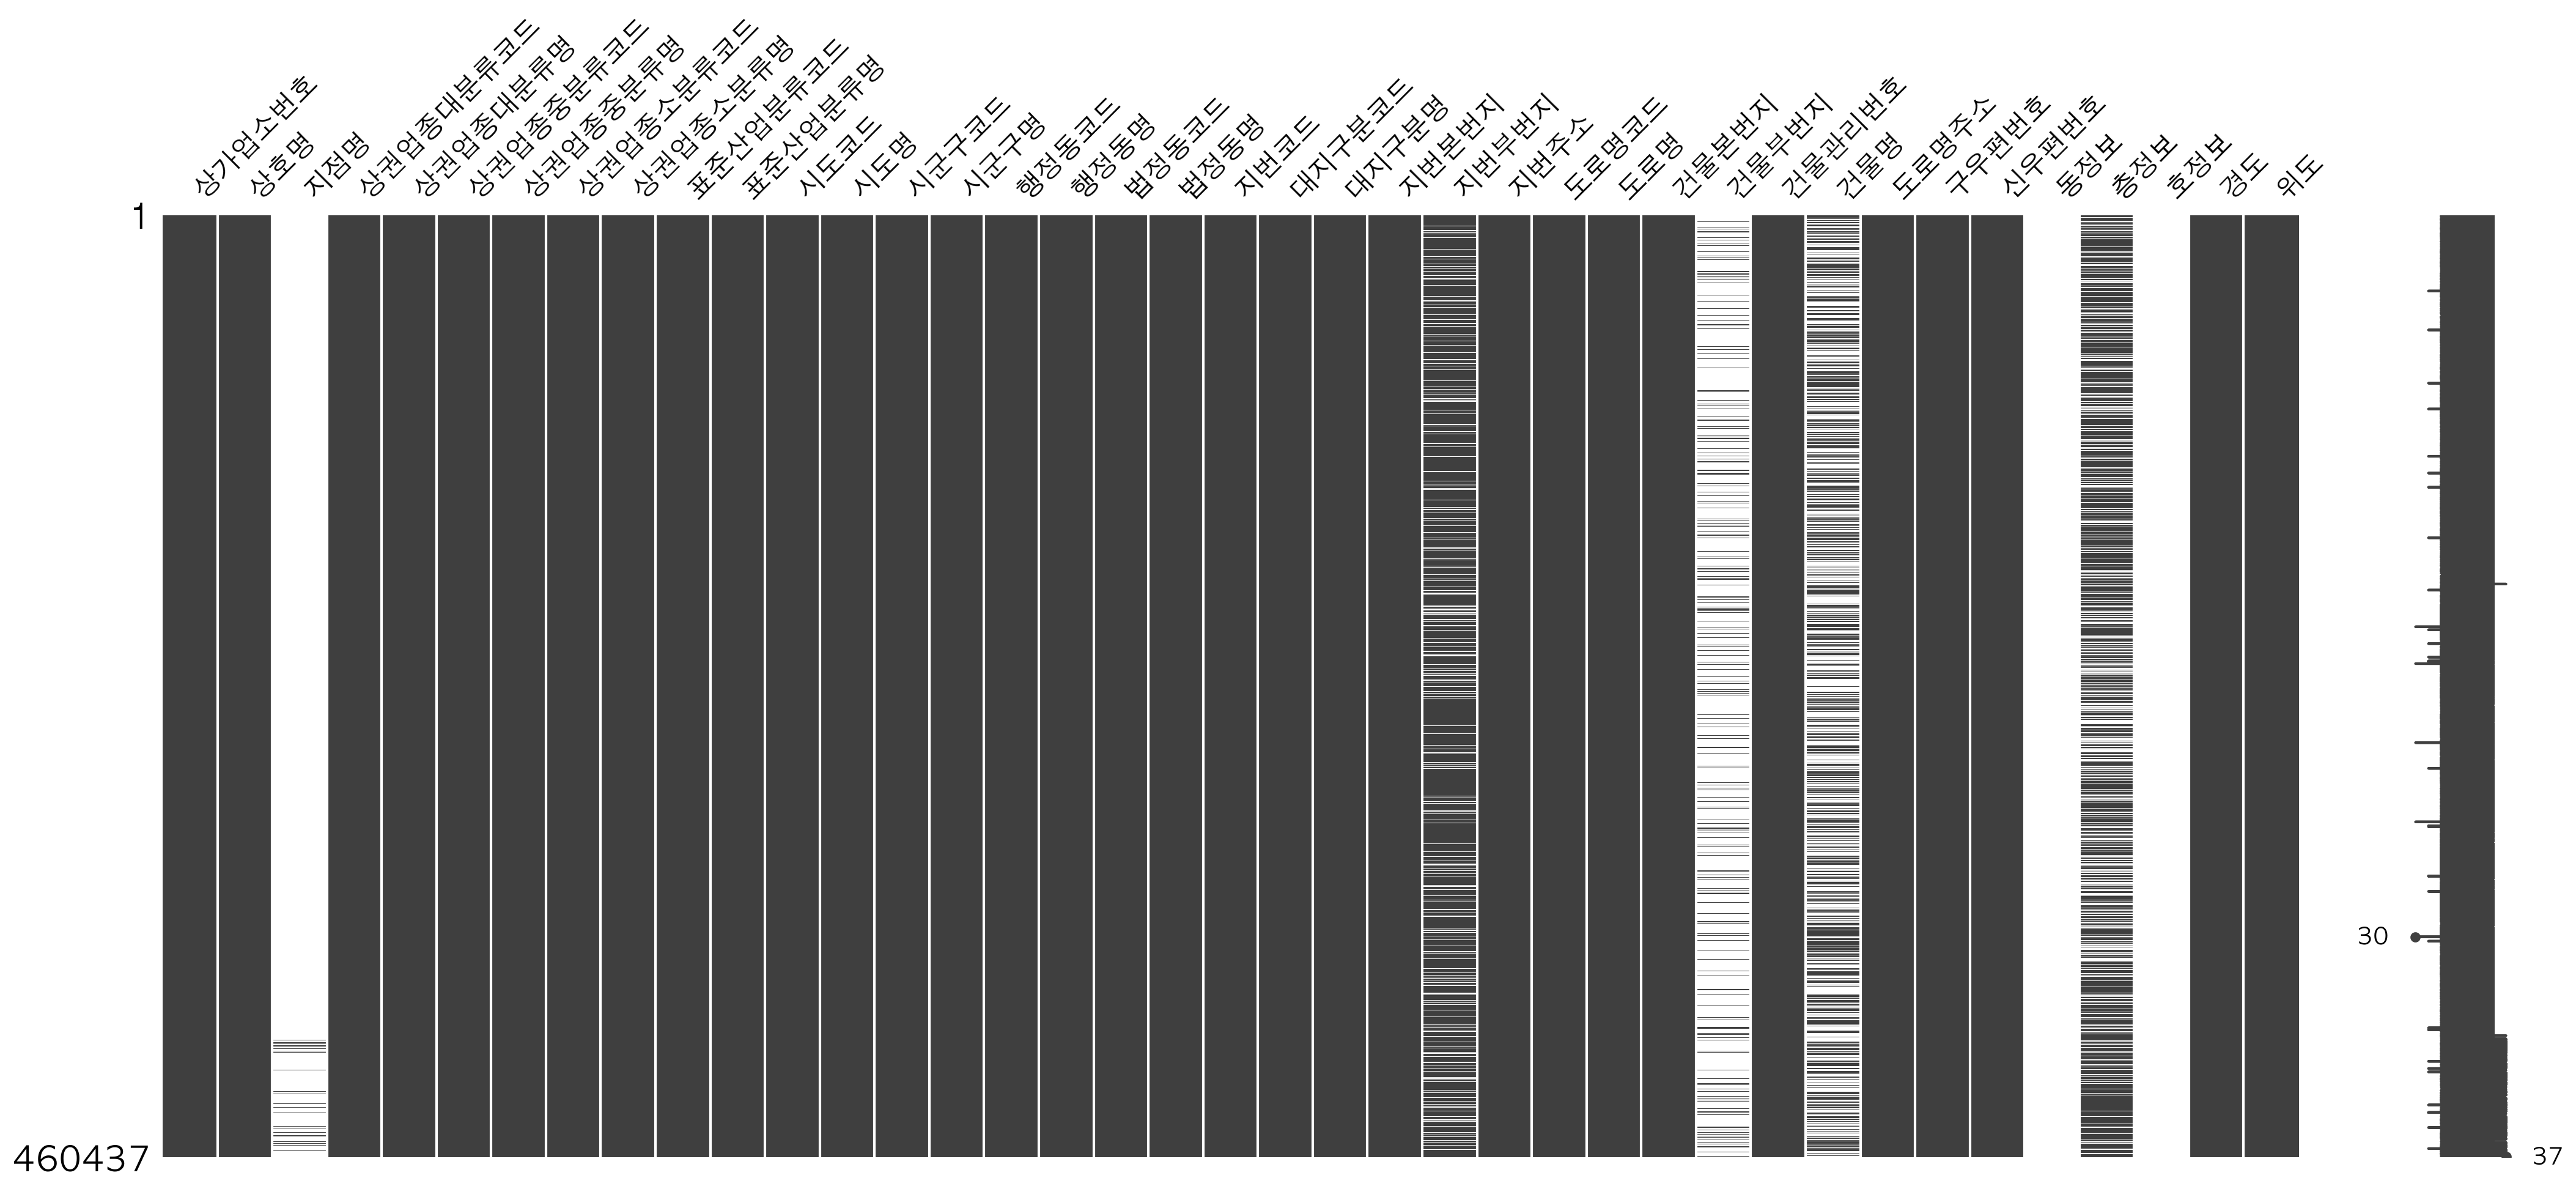

In [215]:
import missingno as msno
msno.matrix(df)

<Axes: >

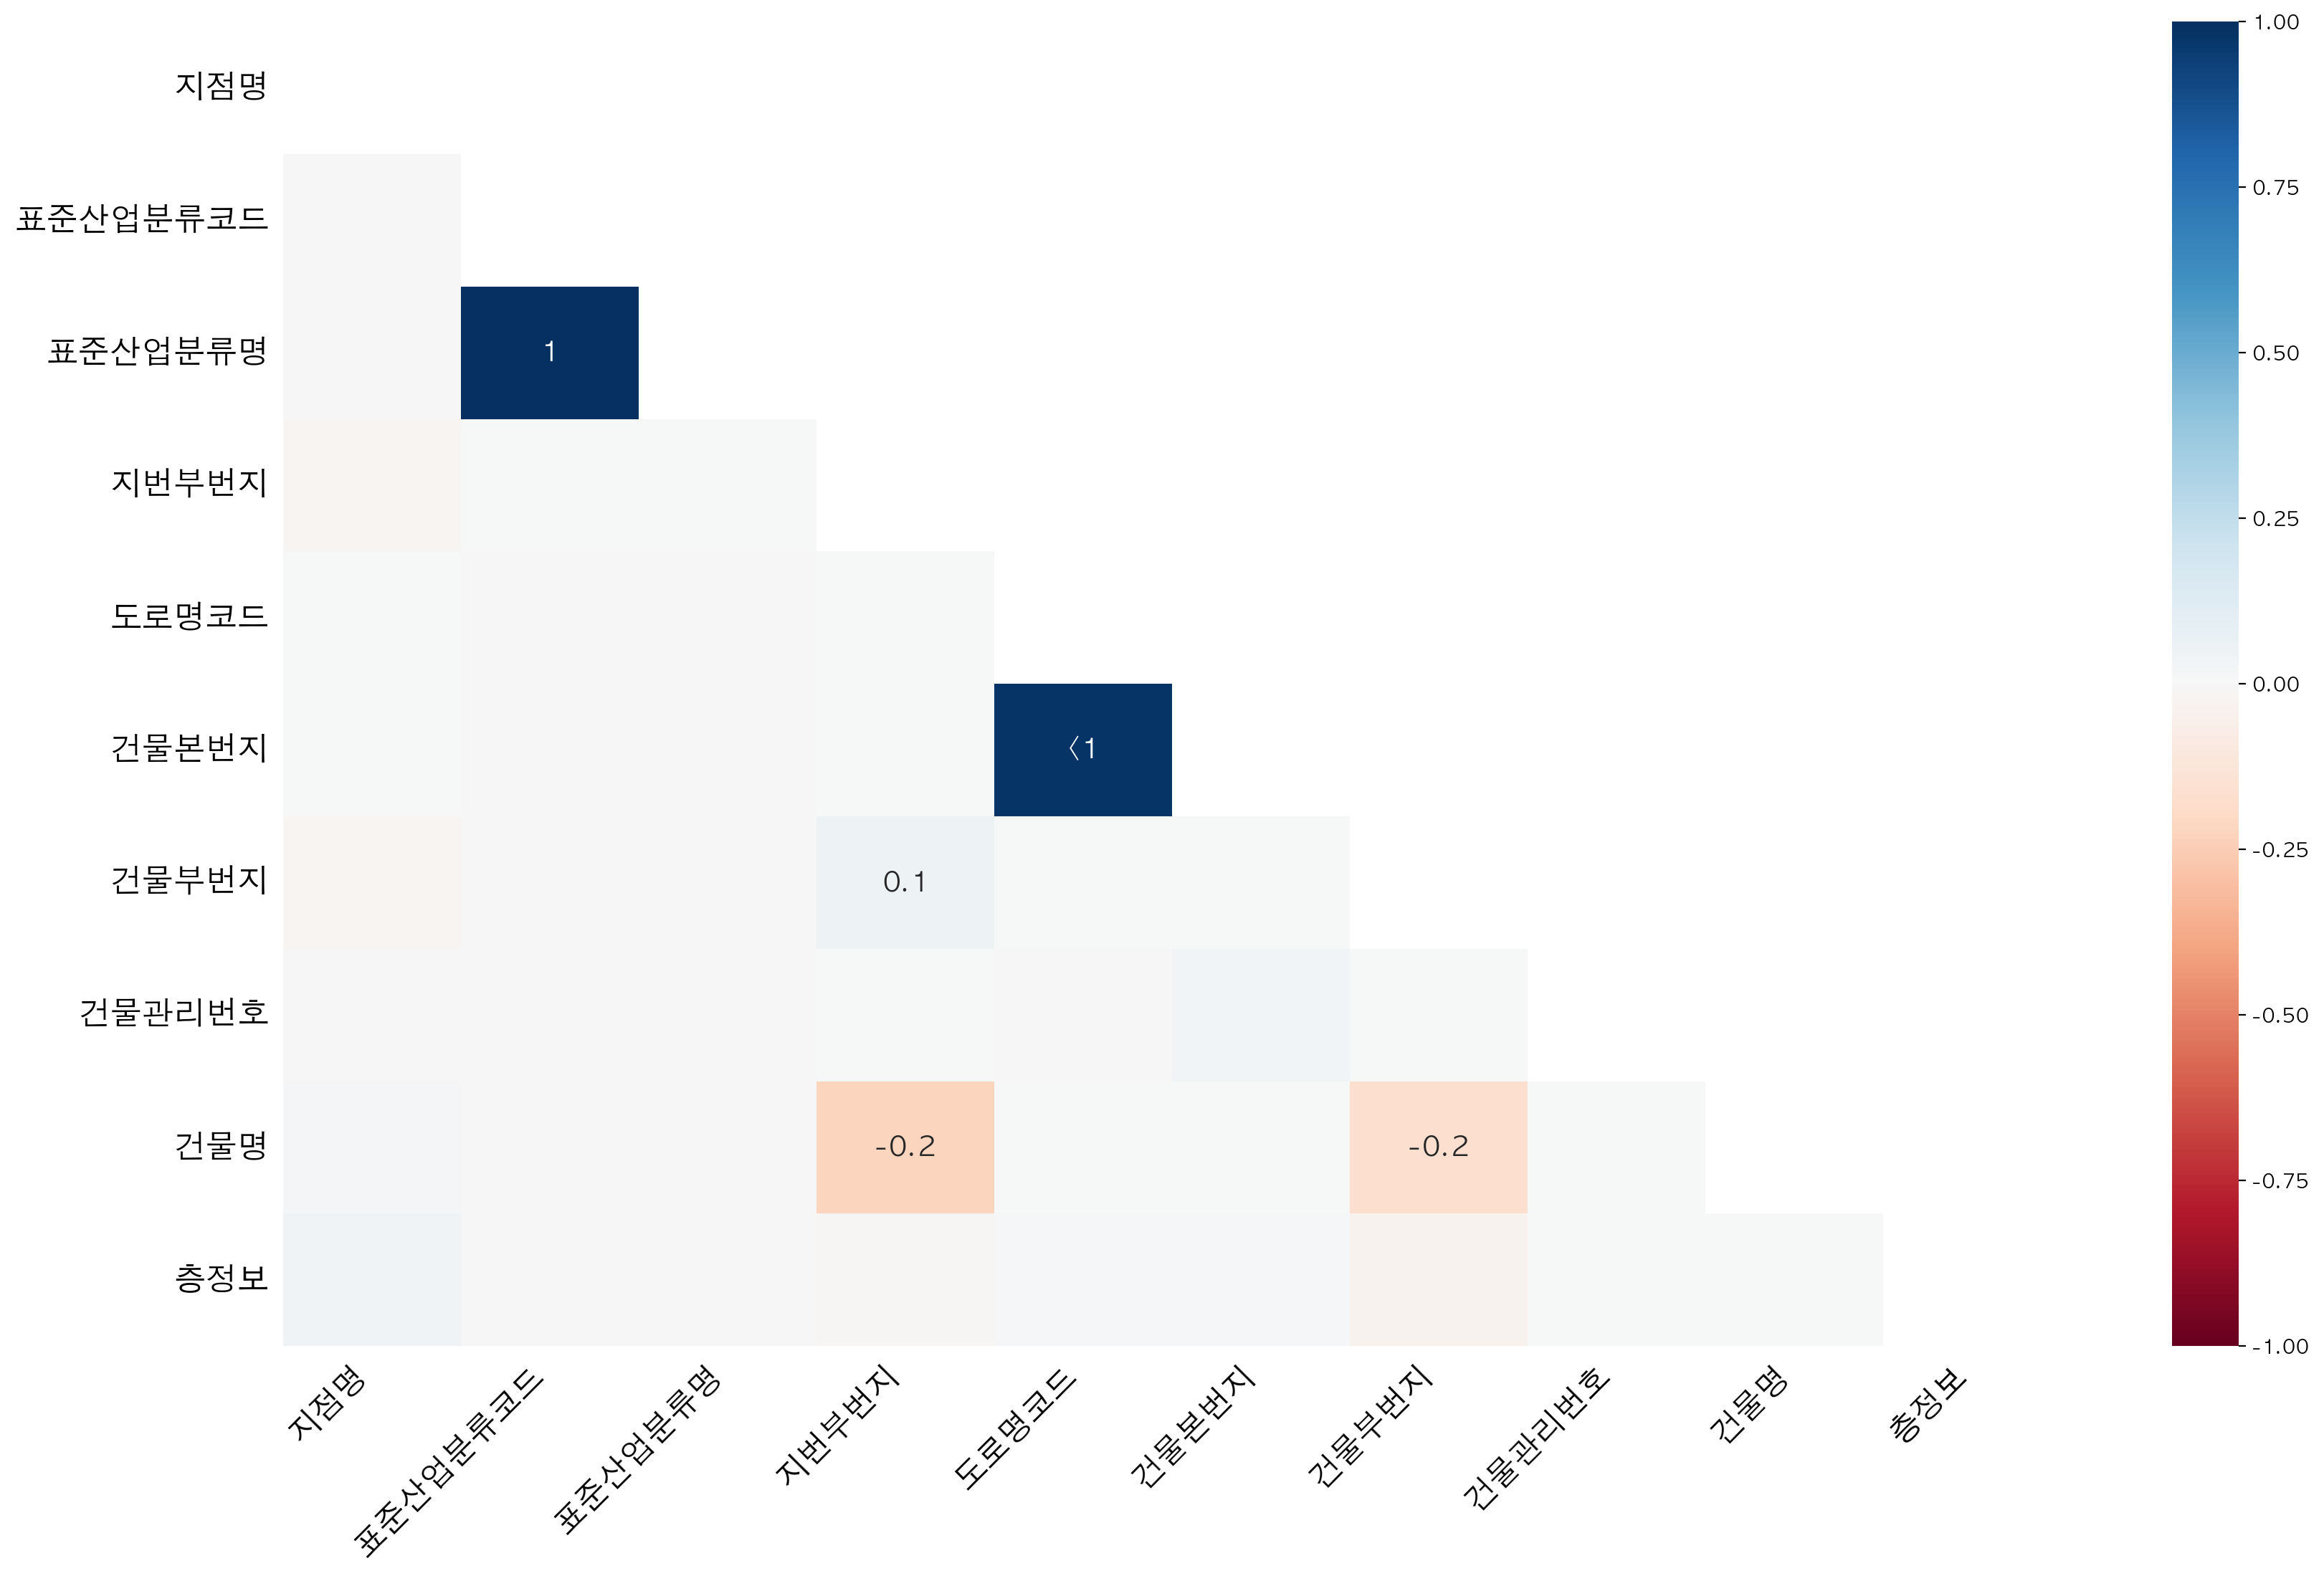

In [216]:
# heatmap 으로 표현합니다.
msno.heatmap(df)

<Axes: >

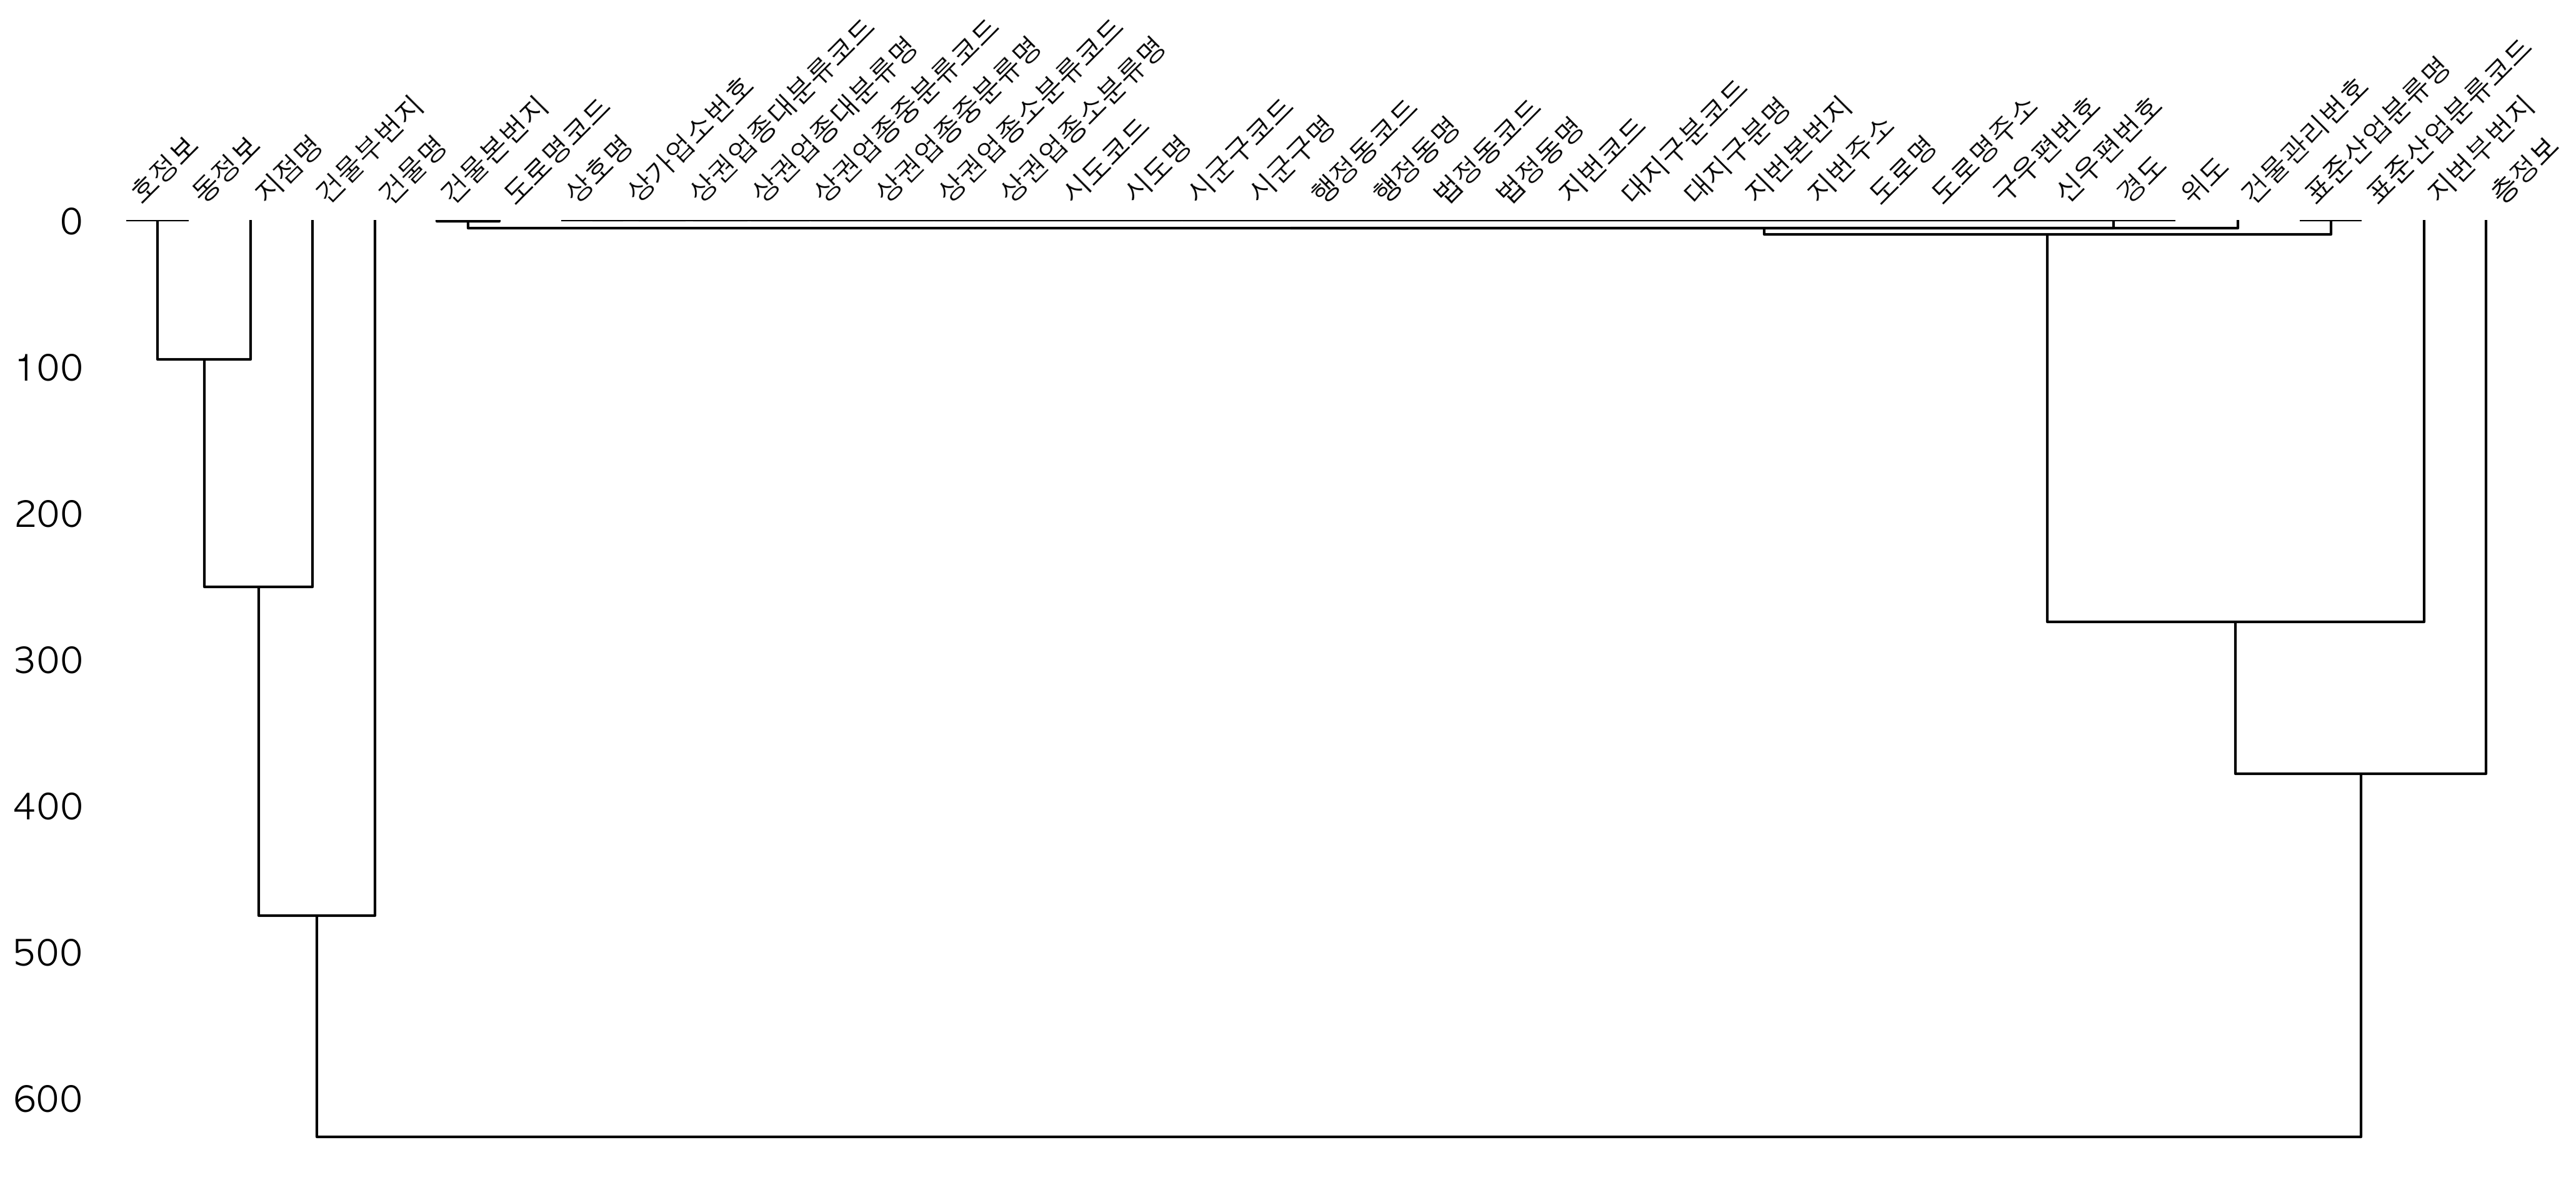

In [217]:
# dendrogram 으로 표현합니다.
msno.dendrogram(df)


## 사용하지 않는 컬럼 제거하기


### 결측치가 너무 많은 컬럼 제거하기


In [218]:
# sort_values 를 통해 결측치가 많은 데이터를 위에서 9개 가져와서 not_use 변수에 담습니다.
# not_use 변수에 담긴 인덱스값만 추출해서 not_use_col 이라는 변수에 담습니다.
not_use = n.sort_values(ascending=False).head(9) 
not_use_col = not_use.index
not_use_col


Index(['호정보', '동정보', '지점명', '건물부번지', '건물명', '층정보', '지번부번지', '표준산업분류명',
       '표준산업분류코드'],
      dtype='object')

In [219]:
# 사용하지 않는 컬럼을 제거하고 잘 제거가 되었는지 shape 의 수로 확인합니다.
print(df.shape)
df = df.drop(not_use_col,axis=1)
print(df.shape)

(460437, 39)
(460437, 30)


In [220]:
# info()를 통해 해당 컬럼이 제거되었는지 확인하며 메모리 사용량이 줄어들었는지 확인합니다.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460437 entries, 0 to 460436
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     460437 non-null  object 
 1   상호명        460437 non-null  object 
 2   상권업종대분류코드  460437 non-null  object 
 3   상권업종대분류명   460437 non-null  object 
 4   상권업종중분류코드  460437 non-null  object 
 5   상권업종중분류명   460437 non-null  object 
 6   상권업종소분류코드  460437 non-null  object 
 7   상권업종소분류명   460437 non-null  object 
 8   시도코드       460437 non-null  int64  
 9   시도명        460437 non-null  object 
 10  시군구코드      460437 non-null  int64  
 11  시군구명       460437 non-null  object 
 12  행정동코드      460437 non-null  int64  
 13  행정동명       460437 non-null  object 
 14  법정동코드      460437 non-null  int64  
 15  법정동명       460437 non-null  object 
 16  지번코드       460437 non-null  int64  
 17  대지구분코드     460437 non-null  int64  
 18  대지구분명      460437 non-null  object 
 19  지번본번지      460437 non-n

### 사용하지 않는 컬럼 제거하기


In [221]:
# 컬럼명을 전처리 하기 위해 cols 라는 변수에 담습니다.
cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [222]:
# 컬럼명에 "코드", "번호"가 있지만 이번 분석에서는 사용하지 않기 때문에
# 해당되는 컬럼만 찾아와서 cols_code 라는 변수에 담습니다.
cols_code = cols[cols.str.contains('코드|번호')]
cols_code


Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [223]:
# "코드", "번호" 가 들어가는 컬럼명만 drop으로 데이터프레임에서 제거합니다.
#  제거 전 후에 shape를 통해 컬럼이 삭제되었는지 확인합니다.
print(df.shape)
df = df.drop(cols_code,axis=1)
print(df.shape)

(460437, 30)
(460437, 16)


In [224]:
# info를 통해 컬럼정보와 메모리 사용량 등을 확인합니다.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460437 entries, 0 to 460436
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       460437 non-null  object 
 1   상권업종대분류명  460437 non-null  object 
 2   상권업종중분류명  460437 non-null  object 
 3   상권업종소분류명  460437 non-null  object 
 4   시도명       460437 non-null  object 
 5   시군구명      460437 non-null  object 
 6   행정동명      460437 non-null  object 
 7   법정동명      460437 non-null  object 
 8   대지구분명     460437 non-null  object 
 9   지번본번지     460437 non-null  int64  
 10  지번주소      460437 non-null  object 
 11  도로명       460437 non-null  object 
 12  건물본번지     460407 non-null  float64
 13  도로명주소     460437 non-null  object 
 14  경도        460437 non-null  float64
 15  위도        460437 non-null  float64
dtypes: float64(3), int64(1), object(12)
memory usage: 56.2+ MB


## 행, 열을 기준으로 값을 가져오기


### 열(column)기준

- df[열이름]
  - 결과가 Pandas 의 Series 형태로 반환
- df[[열목록]] : 2개 이상의 열을 가져올 때는 리스트 형태로 묶어서 지정해주어야 합니다.
  - 결과가 Pandas 의 DataFrame 형태로 반환
  - 1개의 열을 2차원 리스트로 지정할 때에도 DataFrame 형태로 반환이 됩니다.


In [225]:
# "상호명" 컬럼만 가져옵니다.
df['상호명']

0              영자's곱창
1               호텔클로이
2           나라차중계태권도장
3               이상한스냅
4                 토끼정
             ...     
460432    마스터부동산중개사무소
460433     그릿뷰티아카데미학원
460434          최지원렌탈
460435        매직노래연습장
460436            곱창꾼
Name: 상호명, Length: 460437, dtype: object

In [226]:
# "상호명", "도로명주소" 2개의 컬럼을 가져옵니다.
df[['상호명','도로명주소']]


상호명                   도로명주소
0            영자's곱창       서울특별시 광진구 면목로 172
1             호텔클로이      서울특별시 중구 을지로42길 11
2         나라차중계태권도장     서울특별시 노원구 한글비석로 242
3             이상한스냅       서울특별시 양천구 월정로 283
4               토끼정       서울특별시 강서구 마곡동로 55
...             ...                     ...
460432  마스터부동산중개사무소      서울특별시 강서구 공항대로 247
460433   그릿뷰티아카데미학원      서울특별시 중랑구 사가정로 409
460434        최지원렌탈    서울특별시 금천구 시흥대로150길 6
460435      매직노래연습장      서울특별시 구로구 구로중앙로 23
460436          곱창꾼  서울특별시 금천구 시흥대로26길 11-7

[460437 rows x 2 columns]

### 행(row) 기준

- df.loc[행]
- df.loc[행, 열]

- df.loc[행이름 혹은 번호]
  - 결과가 Pandas 의 Series 형태로 반환
- df.loc[[행목록]] : 2개 이상의 행을 가져올 때는 열(column)을 가져올 때와 마찬가지로 리스트 형태로 묶어서 지정해주어야 합니다.
  - 결과가 Pandas 의 DataFrame 형태로 반환
  - 1개의 행을 2차원 리스트로 지정할 때에도 DataFrame 형태로 반환이 됩니다.


In [227]:
# 0 번째 인덱스 행을 가져옵니다.
df.iloc[0]


상호명                       영자's곱창
상권업종대분류명                      음식
상권업종중분류명                      한식
상권업종소분류명                곱창 전골/구이
시도명                        서울특별시
시군구명                         광진구
행정동명                        중곡3동
법정동명                         중곡동
대지구분명                         대지
지번본번지                        169
지번주소        서울특별시 광진구 중곡동 169-21
도로명                서울특별시 광진구 면목로
건물본번지                      172.0
도로명주소          서울특별시 광진구 면목로 172
경도                    127.082832
위도                     37.568503
Name: 0, dtype: object

In [228]:
# 0, 1,2 번째 인덱스 행을 가져옵니다.
df.loc[0:2,:]


상호명 상권업종대분류명 상권업종중분류명  상권업종소분류명    시도명 시군구명  행정동명   법정동명 대지구분명  \
0     영자's곱창       음식       한식  곱창 전골/구이  서울특별시  광진구  중곡3동    중곡동    대지   
1      호텔클로이       숙박    일반 숙박     여관/모텔  서울특별시   중구   광희동  광희동1가    대지   
2  나라차중계태권도장       교육    기타 교육  태권도/무술학원  서울특별시  노원구  중계본동    중계동    대지   

   지번본번지                  지번주소              도로명  건물본번지                도로명주소  \
0    169  서울특별시 광진구 중곡동 169-21    서울특별시 광진구 면목로  172.0    서울특별시 광진구 면목로 172   
1    130    서울특별시 중구 광희동1가 130  서울특별시 중구 을지로42길   11.0   서울특별시 중구 을지로42길 11   
2    364  서울특별시 노원구 중계동 364-19  서울특별시 노원구 한글비석로  242.0  서울특별시 노원구 한글비석로 242   

           경도         위도  
0  127.082832  37.568503  
1  127.005849  37.565708  
2  127.076956  37.649226

In [229]:
# 0번째 행의 "상호명"을 가져옵니다.
df.loc[0,'상호명']


"영자's곱창"

In [230]:
# 0, 1, 2 번째 행의 "상호명"을 가져옵니다.
df.loc[[0,1,2],'상호명']

0       영자's곱창
1        호텔클로이
2    나라차중계태권도장
Name: 상호명, dtype: object

In [231]:
# 0, 1, 2 번째 행의 "상호명", "도로명주소"를 가져옵니다.
df.loc[[0,1,2],['상호명','도로명주소']]


상호명                도로명주소
0     영자's곱창    서울특별시 광진구 면목로 172
1      호텔클로이   서울특별시 중구 을지로42길 11
2  나라차중계태권도장  서울특별시 노원구 한글비석로 242

### iloc 로 슬라이싱을 통해 가져오기

- df.iloc[:] 전체 데이터를 가져옵니다.
- df.iloc[행, 열] 순으로 인덱스 번호를 지정합니다.
- : 은 전체를 의미합니다.
- 시작인덱스:끝나는인덱스+1을 써줍니다.
  - 예) 3:5 라면 3번째 인덱스 부터 4번째 인덱스까지 가져옵니다.
- : 에서 앞이나 뒤 인덱스를 써주지 않으면 처음부터 혹은 끝까지를 의미합니다.
  - 예) :5 => 처음부터 4번 인덱스까지 가져옵니다.
  - 예) 5: => 5번 인덱스부터 끝까지 가져옵니다.
  - 예) -5: => 뒤에서 5번째 부터 끝까지 가져옵니다.
  - 예) :-5 => 처음부터 5번째 전까지 가져옵니다.


In [232]:
# 위에서 5개의 행과, 왼쪽에서 5개의 열을 가져옵니다.
df.iloc[:5,:5]

상호명 상권업종대분류명 상권업종중분류명  상권업종소분류명    시도명
0     영자's곱창       음식       한식  곱창 전골/구이  서울특별시
1      호텔클로이       숙박    일반 숙박     여관/모텔  서울특별시
2  나라차중계태권도장       교육    기타 교육  태권도/무술학원  서울특별시
3      이상한스냅    과학·기술    사진 촬영     사진촬영업  서울특별시
4        토끼정       음식       한식    백반/한정식  서울특별시

In [233]:
# 끝에서 5개의 행과, 오른쪽에서 5개의 열을 가져옵니다.
df.iloc[-5:,-5:]


도로명  건물본번지                   도로명주소          경도  \
460432      서울특별시 강서구 공항대로  247.0      서울특별시 강서구 공항대로 247  126.834810   
460433      서울특별시 중랑구 사가정로  409.0      서울특별시 중랑구 사가정로 409  127.090213   
460434  서울특별시 금천구 시흥대로150길    6.0    서울특별시 금천구 시흥대로150길 6  126.899154   
460435     서울특별시 구로구 구로중앙로   23.0      서울특별시 구로구 구로중앙로 23  126.891074   
460436   서울특별시 금천구 시흥대로26길   11.0  서울특별시 금천구 시흥대로26길 11-7  126.904333   

               위도  
460432  37.559341  
460433  37.580598  
460434  37.475441  
460435  37.492071  
460436  37.442069

## 기술통계 값 보기


### describe 로 요약하기

- describe 를 사용하면 데이터를 요약해 볼 수 있습니다.
- 기본적으로 수치형 데이터를 요약해서 보여줍니다.
- include, exclude 옵션으로 데이터 타입에 따른 요약수치를 볼 수 있습니다.
- 데이터의 갯수, 평균, 표준편차, 최솟값, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.
- [Descriptive statistics - Wikipedia](https://en.wikipedia.org/wiki/Descriptive_statistics)


In [234]:
# describe 로 기술통계값을 봅니다.
# DataFrame.count: Count number of non-NA/null observations.
# DataFrame.max: Maximum of the values in the object.
# DataFrame.min: Minimum of the values in the object.
# DataFrame.mean: Mean of the values.
# DataFrame.std: Standard deviation of the observations.
# DataFrame.select_dtypes: Subset of a DataFrame including/excluding
#     columns based on their dtype.
df.describe().round()


지번본번지     건물본번지        경도        위도
count  460437.0  460407.0  460437.0  460437.0
mean      428.0     143.0     127.0      38.0
std       438.0     263.0       0.0       0.0
min         1.0       1.0     127.0      37.0
25%        97.0      18.0     127.0      38.0
50%       298.0      47.0     127.0      38.0
75%       648.0     158.0     127.0      38.0
max      9999.0    3646.0     127.0      38.0

In [235]:
# 필요한 컬럼에 대한 요약만 봅니다.
# 위도, 경도 만 따로 가져와 요약합니다.

df[['위도','경도']].describe()


위도             경도
count  460437.000000  460437.000000
mean       37.540368     126.992679
std         0.047467       0.082127
min        37.430448     126.768169
25%        37.501633     126.922447
50%        37.536413     127.009369
75%        37.568276     127.051881
max        37.692595     127.182638

### 개별 기술통계 값 구하기

- [Computational tools — pandas 1.0.1 documentation](https://pandas.pydata.org/docs/user_guide/computation.html#method-summary)

- count 결측치를 제외한 (NaN이 아닌) 값의 갯수를 계산
- min, max 최솟값, 최댓값
- argmin, argmax 최솟값, 최댓값이 위치한 (정수)인덱스를 반환
- idxmin, idxmax 인덱스 중 최솟값, 최댓값을 반환
- quantile 특정 사분위수에 해당하는 값을 반환 (0~1 사이)
  - 0.25 : 1사분위 수
  - 0.5 : 2사분위수 (quantile 의 기본 값)
  - 0.75 : 3사분위수
- sum 수치 데이터의 합계
- mean 평균
- median 중앙값(중간값:데이터를 한 줄로 세웠을 때 가운데 위치하는 값, 중앙값이 짝수일 때는 가운데 2개 값의 평균을 구함)
- mad 평균값으로부터의 절대 편차(absolute deviation)의 평균
- std, var 표준편차, 분산을 계산
- cumsum 맨 첫 번째 성분부터 각 성분까지의 누적합을 계산 (0 번째 부터 계속 더해짐)
- cumprod 맨 첫번째 성분부터 각 성분까지의 누적곱을 계산 (1 번째 부터 계속 곱해짐)


In [236]:
# 결측치를 제외한 (NaN이 아닌) 값의 갯수를 계산
df['위도'].count()


460437

In [237]:
# 평균
df['위도'].mean()

37.54036795107571

In [238]:
# 최댓값
df.위도.max()


37.6925951172108

In [239]:
# 최솟값
df.위도.min()

37.4304483344642

In [240]:
# 1사분위 수(25%)
df['위도'].quantile(0.25)

37.5016334065493

In [241]:
# 2사분위 수(50%) == 중앙값
df['위도'].quantile()


37.5364125510898

In [242]:
# 중앙값
df['위도'].median()

37.5364125510898

In [243]:
# 중앙값 vs 평균값
df['위도'].mean()

37.54036795107571

In [244]:
# 분산
# 분산 = var() variance
df['위도'].var()

0.002253106311759699

- 출처 : [표준 편차 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%91%9C%EC%A4%80_%ED%8E%B8%EC%B0%A8)

표준 편차(標準 偏差, 영어: standard deviation)는 자료의 산포도를 나타내는 수치로, 분산의 양의 제곱근으로 정의된다. 표준편차가 작을수록 평균값에서 변량들의 거리가 가깝다.[1] 통계학과 확률에서 주로 확률의 분포, 확률변수 혹은 측정된 인구나 중복집합을 나타낸다. 일반적으로 모집단의 표준편차는 {\displaystyle \sigma }\sigma (시그마)로, 표본의 표준편차는 {\displaystyle S}S(에스)로 나타낸다.[출처 필요]

편차(deviation)는 관측값에서 평균 또는 중앙값을 뺀 것이다.

분산(variance)은 관측값에서 평균을 뺀 값을 제곱하고, 그것을 모두 더한 후 전체 개수로 나눠서 구한다. 즉, 차이값의 제곱의 평균이다. 관측값에서 평균을 뺀 값인 편차를 모두 더하면 0이 나오므로 제곱해서 더한다.

표준 편차(standard deviation)는 분산을 제곱근한 것이다. 제곱해서 값이 부풀려진 분산을 제곱근해서 다시 원래 크기로 만들어준다.


In [245]:
# 표준편차 => 분산에 root 를 씌운 값입니다.
import numpy as np
# 분산을 제곱
np.sqrt(df['위도'].var())


0.04746689701001846

In [246]:
df['위도'].std()

0.04746689701001846

### 단변량 수치형 변수 시각화


<Axes: xlabel='위도', ylabel='Count'>

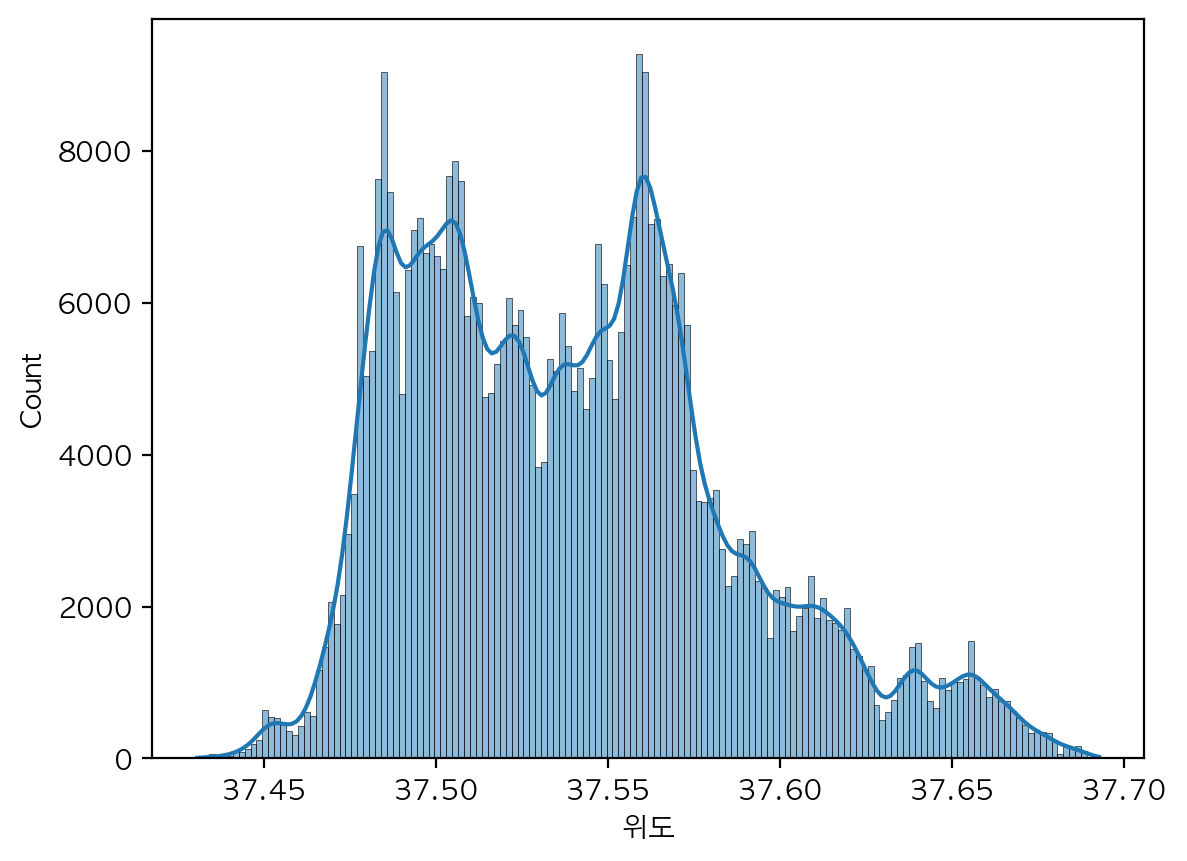

In [247]:
# 위도의 distplot 을 그립니다.
sns.histplot(df['위도'],kde=True)

<Axes: xlabel='경도', ylabel='Count'>

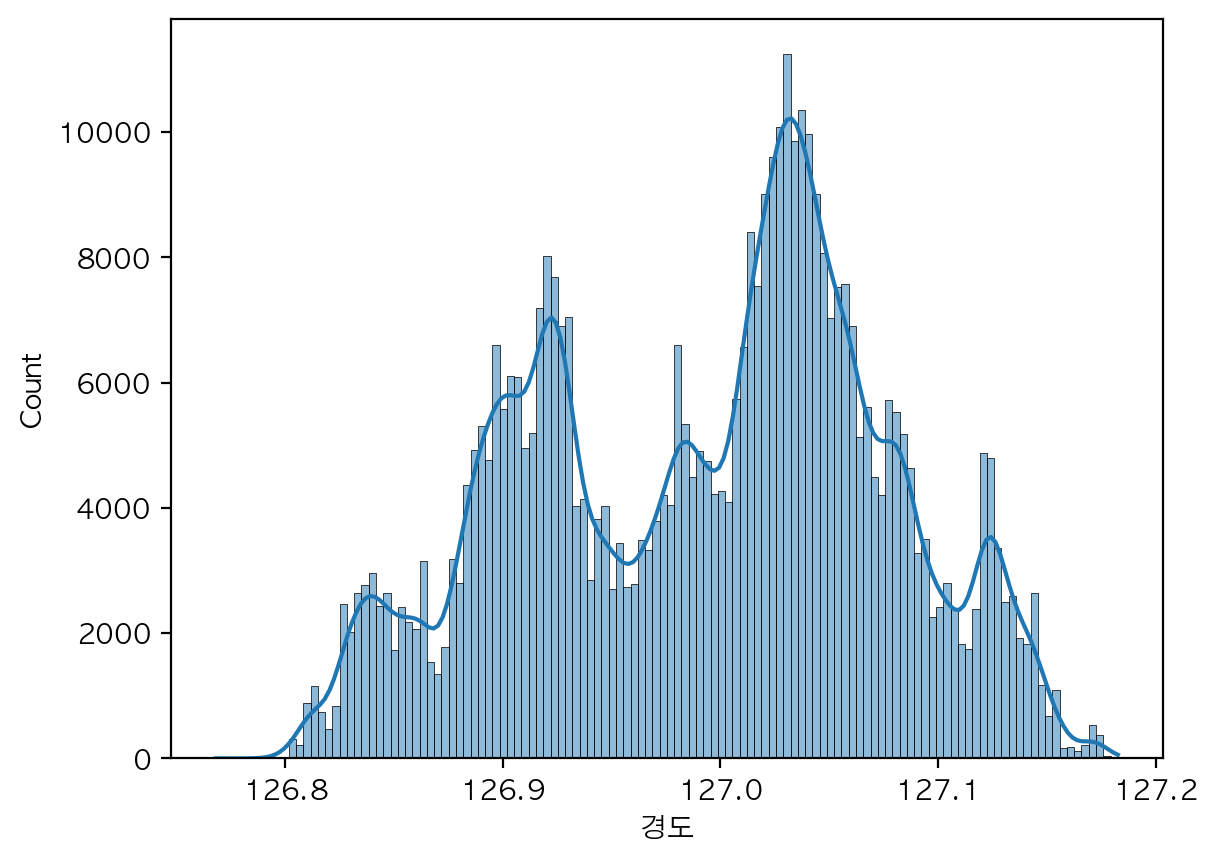

In [248]:
# 경도의 distplot 을 그립니다.
sns.histplot(df['경도'],kde=True)

<Axes: xlabel='위도', ylabel='Count'>

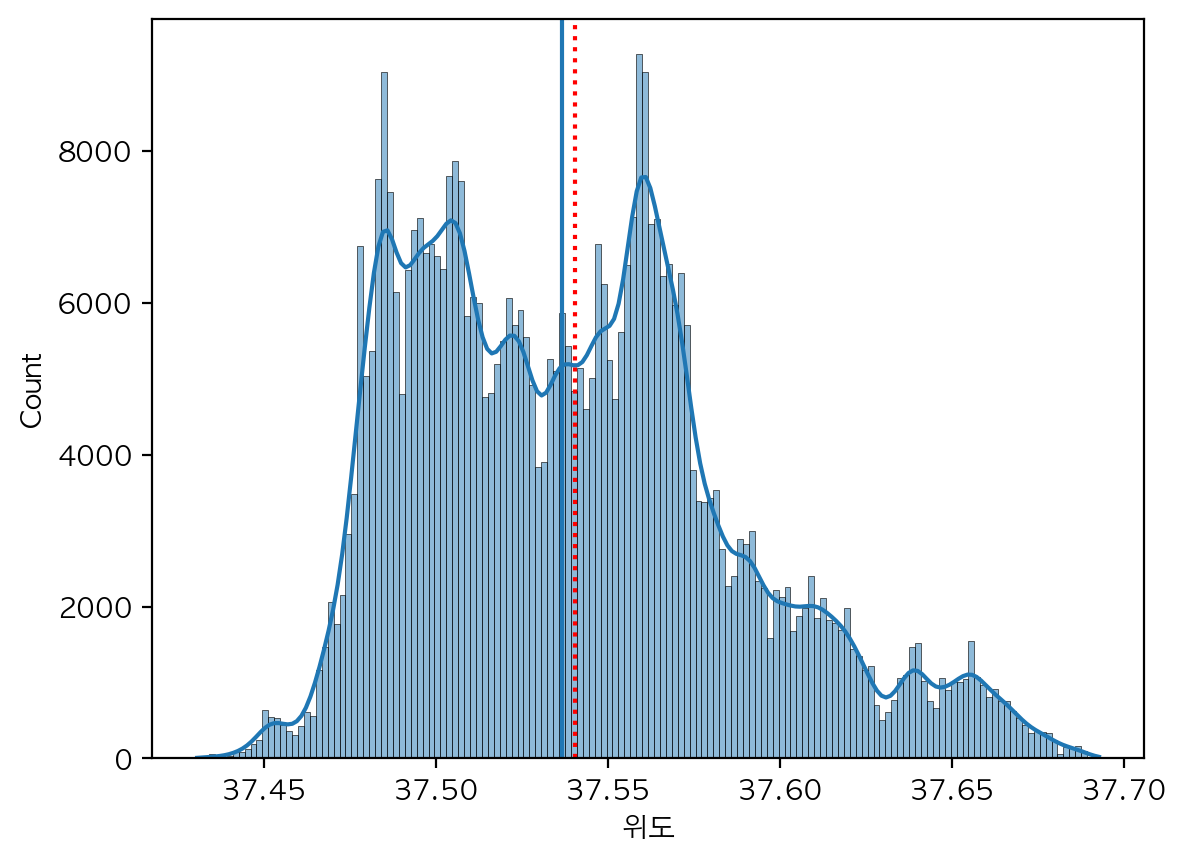

In [249]:
# 위도의 평균, 중앙값을 표현하고 color로 선의 색상을 linestyle 로 점선으로 표시해 봅니다.
plt.axvline(df['위도'].mean(),linestyle=":",color='r')
plt.axvline(df['위도'].median(),linestyle="-")
sns.histplot(df['위도'],kde=True)

### 상관계수

- [상관 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)
- r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다.
- 결정계수(coefficient of determination) 는 r \*\* 2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.
  - r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
  - r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
  - r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
  - r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
  - r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
  - r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
  - r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png" width="600">

이미지 출처 : [Correlation and dependence - Wikipedia](https://en.wikipedia.org/wiki/Correlation_and_dependence)


In [250]:
# 각 변수의 상관계수를 구합니다.
# 기본값 변경으로 numeric_only=True 를 지정해야지만 오류가 발생하지 않습니다.
# corr = df.corr(numeric_only=True)
corr = df.corr(numeric_only=True)

- 상관계수 시각화 : https://seaborn.pydata.org/examples/many_pairwise_correlations.html


<Axes: >

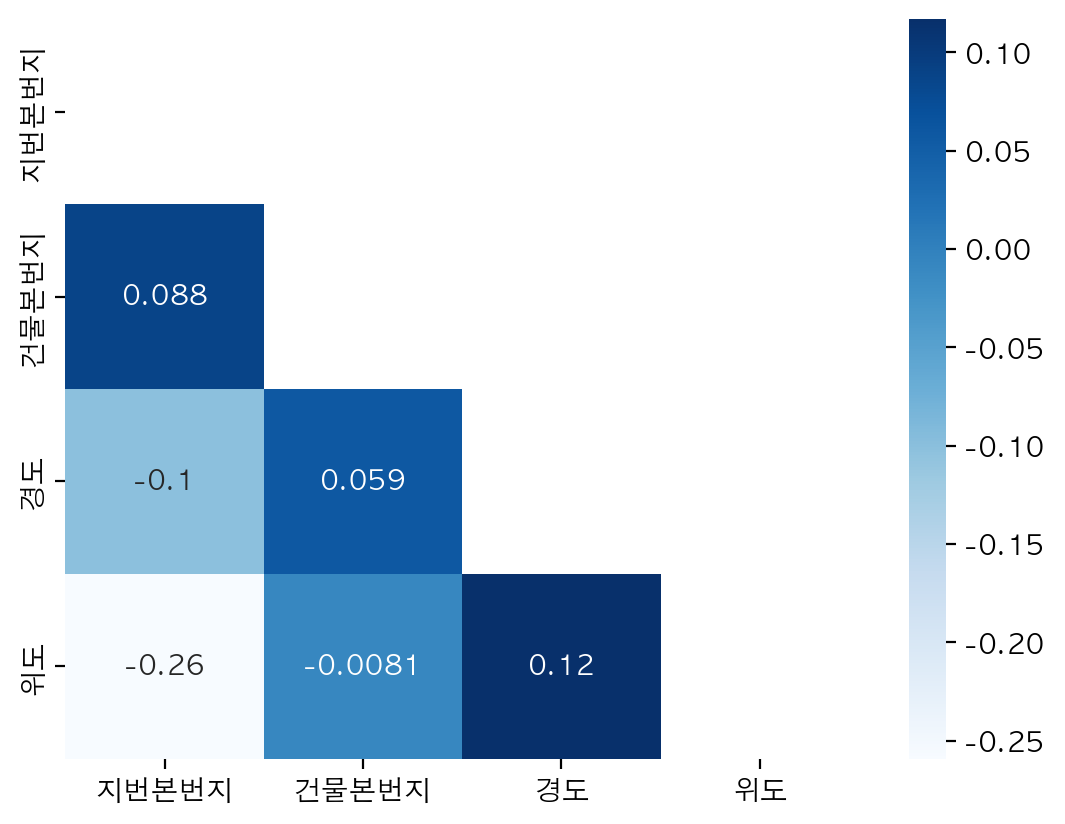

In [251]:
# 위에서 구한 상관계수를 시각화 합니다.
mask = np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,annot=True, cmap='Blues',mask=mask)

### 산점도로 이변량 수치형 변수 표현하기


<Axes: xlabel='경도', ylabel='위도'>

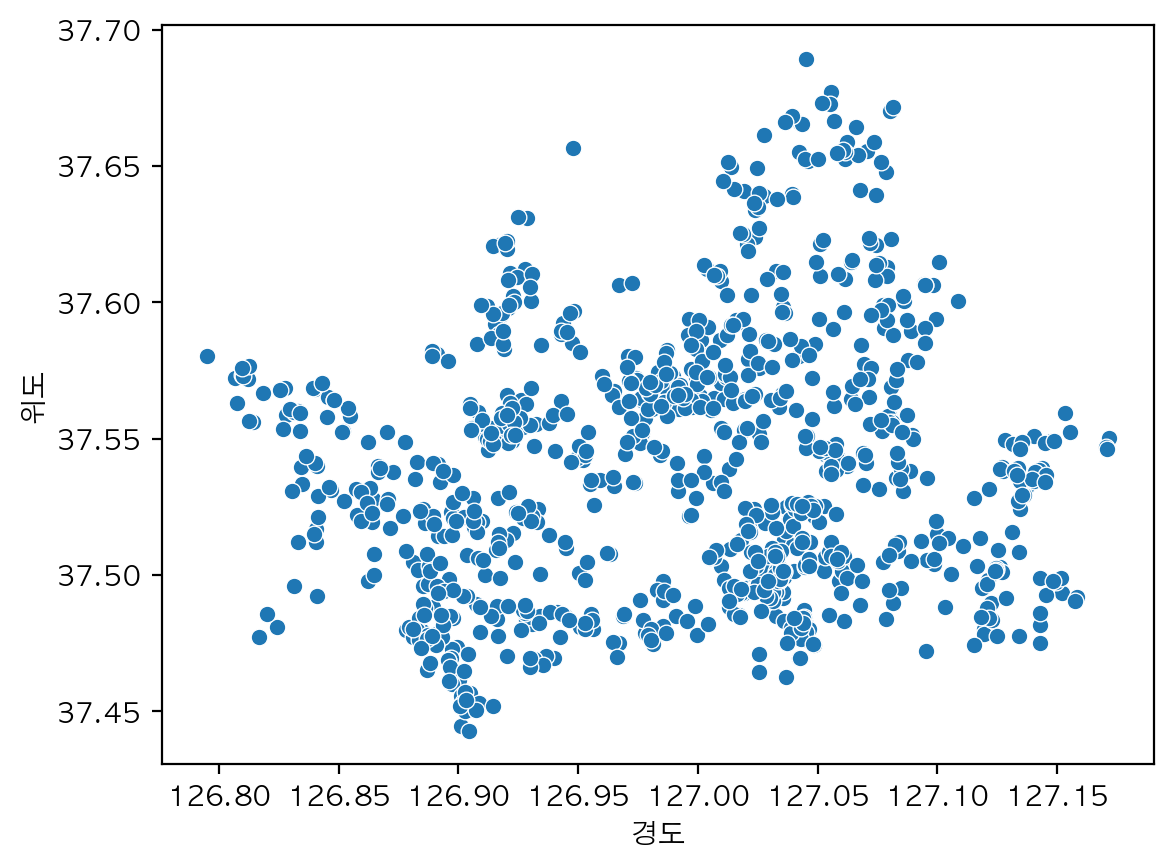

In [252]:
# scatterplot 으로 경도와 위도를 표현하며,
# 데이터의 갯수가 많으면 오래 걸리기 때문에 1000 개의 샘플을 추출해서 그립니다.
sns.scatterplot(data=df.sample(1000),x='경도',y='위도')


<Axes: xlabel='경도', ylabel='위도'>

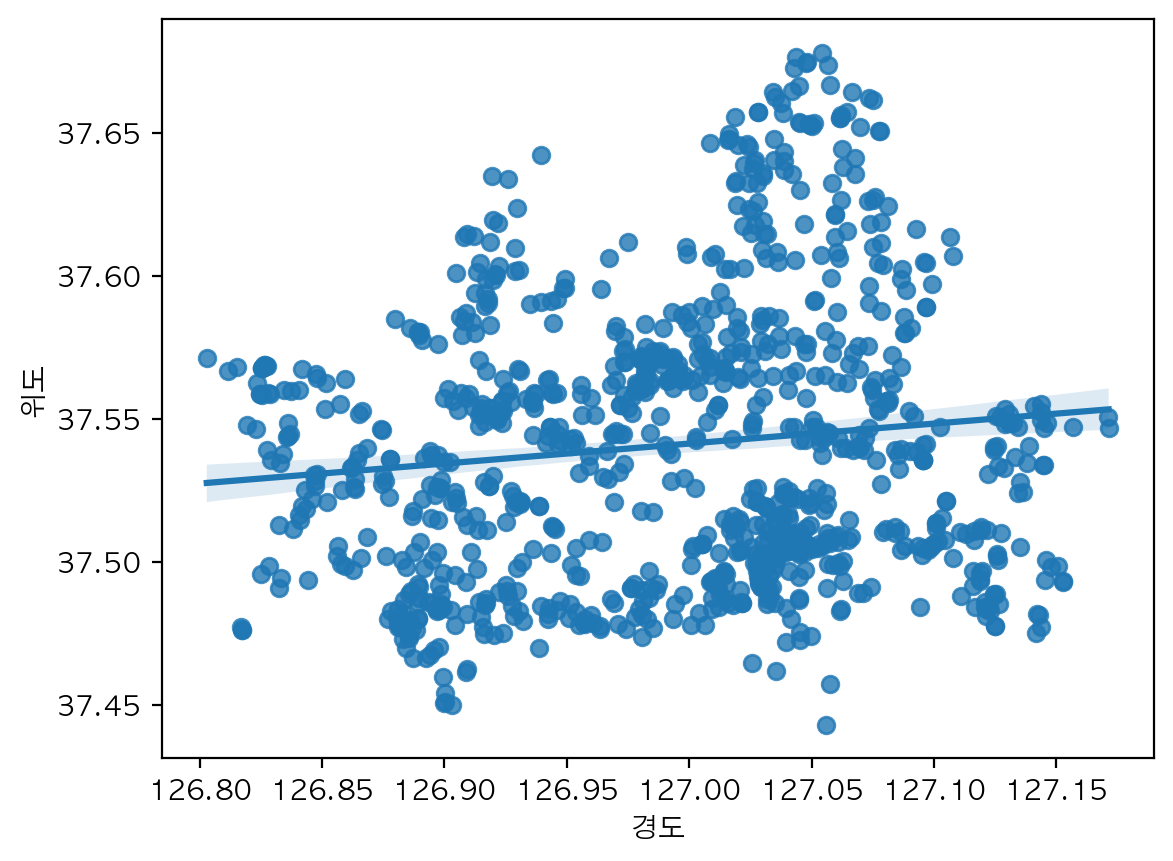

In [253]:
# 위 시각화에서 회귀선을 그립니다.
sns.regplot(data=df.sample(1000),x='경도',y='위도')

[Anscombe’s quartet — seaborn 0.10.0 documentation](https://seaborn.pydata.org/examples/anscombes_quartet.html)


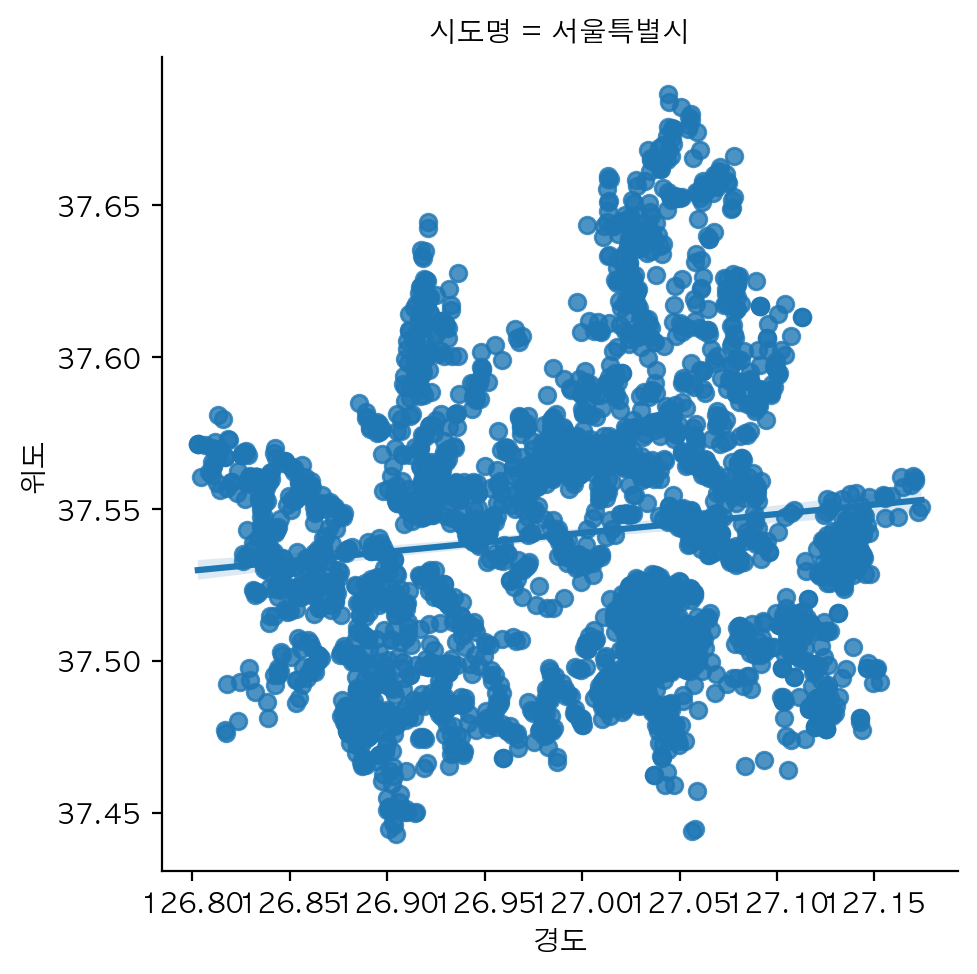

In [254]:
# 회귀선을 그리는 그래프의 서브플롯을 그립니다.
sns.lmplot(data=df.sample(3000),x='경도',y='위도',hue='시도명',col='시도명')

### object 타입의 데이터 요약하기


In [255]:
# include="object" 로 문자열 데이터에 대한 요약을 봅니다.
df.describe(include='object')


상호명 상권업종대분류명 상권업종중분류명    상권업종소분류명     시도명    시군구명    행정동명    법정동명  \
count   460437   460437   460437      460437  460437  460437  460437  460437   
unique  364124       10       75         247       1      25     425     464   
top      컴퓨터수리       음식       한식  부동산 중개/대리업   서울특별시     강남구    역삼1동     서초동   
freq       362   126021    44408       23470  460437   55391   11875   15766   

         대지구분명               지번주소             도로명             도로명주소  
count   460437             460437          460437            460437  
unique       2             150239           12407            146714  
top         대지  서울특별시 송파구 문정동 634  서울특별시 강남구 테헤란로  서울특별시 송파구 충민로 66  
freq    459947                903            3885              1140

In [256]:
# 상권업종대분류명 의 요약값을 봅니다.
df['상권업종대분류명'].describe()


count     460437
unique        10
top           음식
freq      126021
Name: 상권업종대분류명, dtype: object

In [257]:
# 상권업종대분류명 의 unique 값을 봅니다.
df['상권업종대분류명'].unique()


array(['음식', '숙박', '교육', '과학·기술', '소매', '시설관리·임대', '수리·개인', '부동산',
       '예술·스포츠', '보건의료'], dtype=object)

In [258]:
# 상권업종대분류명 의 unique 값의 갯수를 세어봅니다.
# nunique()
df['상권업종대분류명'].nunique()

10

In [259]:
# 최빈값
df['상권업종대분류명'].mode()

0    음식
Name: 상권업종대분류명, dtype: object

### 범주형 변수의 빈도수 구하기


In [260]:
# value_counts 로 상권업종대분류명 의 빈도수를 구합니다.
df['상권업종대분류명'].value_counts()


상권업종대분류명
음식         126021
소매          98768
과학·기술       86180
수리·개인       46615
교육          26011
부동산         23470
시설관리·임대     21409
예술·스포츠      18199
보건의료         7689
숙박           6075
Name: count, dtype: int64

## 인덱싱과 필터로 서브셋 만들기


In [261]:
# "상권업종대분류명" 이 "음식인 데이터만 가져오기
# df_food 라는 변수에 담아줍니다. 서브셋을 새로운 변수에 저장할 때 copy()를 사용하는 것을 권장합니다.
df_food = df[df['상권업종대분류명']=='음식'].copy()
df_food.head()

상호명 상권업종대분류명 상권업종중분류명  상권업종소분류명    시도명 시군구명  행정동명 법정동명 대지구분명  지번본번지  \
0     영자's곱창       음식       한식  곱창 전골/구이  서울특별시  광진구  중곡3동  중곡동    대지    169   
4        토끼정       음식       한식    백반/한정식  서울특별시  강서구  가양1동  마곡동    대지    774   
5        가배차       음식       한식    백반/한정식  서울특별시  송파구  송파1동  송파동    대지    143   
6   비에이치씨항동점       음식    기타 간이        치킨  서울특별시  구로구    항동   항동    대지    100   
10       카페숲       음식    비알코올         카페  서울특별시  금천구  시흥5동  시흥동    대지    929   

                    지번주소                도로명  건물본번지                  도로명주소  \
0   서울특별시 광진구 중곡동 169-21      서울특별시 광진구 면목로  172.0      서울특별시 광진구 면목로 172   
4   서울특별시 강서구 마곡동 774-12     서울특별시 강서구 마곡동로   55.0      서울특별시 강서구 마곡동로 55   
5    서울특별시 송파구 송파동 143-2      서울특별시 송파구 가락로  209.0      서울특별시 송파구 가락로 209   
6     서울특별시 구로구 항동 100-5      서울특별시 구로구 연동로  233.0      서울특별시 구로구 연동로 233   
10  서울특별시 금천구 시흥동 929-10  서울특별시 금천구 시흥대로40길  129.0  서울특별시 금천구 시흥대로40길 129   

            경도         위도  
0   127.082832  37.568503  
4   126.833022  37.560053  
5   127.116136  37.507170  
6   126.820686  37.481640  
10  126.909939  37.446689

### 강남구의 상권업종대분류가 음식만 보기


In [262]:
# 시군구명이 "강남구" 인 데이터만 가져옵니다.
df[df['시군구명'] == '강남구']

상호명 상권업종대분류명   상권업종중분류명    상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
7            무지개삼성약국       소매  의약·화장품 소매          약국  서울특별시  강남구  일원1동  일원동   
15             스튜디온디    과학·기술      사진 촬영       사진촬영업  서울특별시  강남구  논현2동  논현동   
20        나루공인중개사사무소      부동산    부동산 서비스  부동산 중개/대리업  서울특별시  강남구  역삼1동  역삼동   
27           소,돼지불맛집       음식         한식   돼지고기 구이/찜  서울특별시  강남구  역삼1동  역삼동   
30            돈통마늘보쌈       음식         한식       족발/보쌈  서울특별시  강남구   세곡동  세곡동   
...              ...      ...        ...         ...    ...  ...   ...  ...   
460399        생동력연구소       교육      일반 교육     입시·교과학원  서울특별시  강남구  역삼1동  역삼동   
460407          호라이즌    과학·기술         광고      광고 대행업  서울특별시  강남구  논현2동  논현동   
460408  설빙고25대모산입구역점       소매      종합 소매        슈퍼마켓  서울특별시  강남구  개포2동  일원동   
460411          정성한줄       음식      기타 간이    김밥/만두/분식  서울특별시  강남구  대치1동  대치동   
460422        에프앤비공간    과학·기술  본사·경영 컨설팅     경영 컨설팅업  서울특별시  강남구  압구정동  신사동   

       대지구분명  지번본번지                   지번주소                도로명  건물본번지  \
7         대지    684    서울특별시 강남구 일원동 684-5      서울특별시 강남구 일원로   45.0   
15        대지     65    서울특별시 강남구 논현동 65-24  서울특별시 강남구 언주로147길   42.0   
20        대지    702   서울특별시 강남구 역삼동 702-10     서울특별시 강남구 테헤란로  311.0   
27        대지    645    서울특별시 강남구 역삼동 645-3   서울특별시 강남구 논현로95길   29.0   
30        대지    587      서울특별시 강남구 세곡동 587  서울특별시 강남구 헌릉로569길    9.0   
...      ...    ...                    ...                ...    ...   
460399    대지    831      서울특별시 강남구 역삼동 831     서울특별시 강남구 강남대로  354.0   
460407    대지    226    서울특별시 강남구 논현동 226-6  서울특별시 강남구 봉은사로33길   32.0   
460408    대지    743      서울특별시 강남구 일원동 743     서울특별시 강남구 영동대로   22.0   
460411    대지   1021  서울특별시 강남구 대치동 1021-10      서울특별시 강남구 삼성로  237.0   
460422    대지    646   서울특별시 강남구 신사동 646-19  서울특별시 강남구 언주로168길   40.0   

                       도로명주소          경도         위도  
7           서울특별시 강남구 일원로 45  127.081499  37.489893  
15      서울특별시 강남구 언주로147길 42  127.030946  37.519197  
20        서울특별시 강남구 테헤란로 311  127.044843  37.503740  
27       서울특별시 강남구 논현로95길 29  127.033648  37.501811  
30       서울특별시 강남구 헌릉로569길 9  127.100762  37.466785  
...                      ...         ...        ...  
460399    서울특별시 강남구 강남대로 354  127.029714  37.494642  
460407  서울특별시 강남구 봉은사로33길 32  127.035102  37.510077  
460408     서울특별시 강남구 영동대로 22  127.074145  37.491088  
460411     서울특별시 강남구 삼성로 237  127.060846  37.498345  
460422  서울특별시 강남구 언주로168길 40  127.036756  37.525705  

[55391 rows x 16 columns]

In [263]:
# 이번에는 시군구명이 "강남구" 이고 "상권업종대분류명" 이 "음식"인 서브셋을 가져온 후
# "상권업종중분류명" 별로 빈도수를 구합니다.
df[(df['시군구명'] == '강남구') & (df['상권업종대분류명'] == '음식')]['상권업종중분류명'].value_counts()


상권업종중분류명
한식         3753
비알코올       1928
기타 간이      1897
주점         1162
서양식         977
일식          824
중식          397
동남아시아       171
구내식당·뷔페     131
기타 외국         2
Name: count, dtype: int64

In [264]:
# 위와 똑같이 구하지만 이번에는 loc를 사용합니다.
# loc[행, 열]
df.loc[(df['시군구명'] == '강남구') & (df['상권업종대분류명'] == '음식'),
       '상권업종중분류명'].value_counts()

상권업종중분류명
한식         3753
비알코올       1928
기타 간이      1897
주점         1162
서양식         977
일식          824
중식          397
동남아시아       171
구내식당·뷔페     131
기타 외국         2
Name: count, dtype: int64

### 구별 음식점 업종 비교하기


In [265]:
# df_seoul_food 에 "시도명"이 "서울특별시" 이고 "상권업종대분류명" 이 "음식" 에 대한 서브셋만 가져와서 담아줍니다.
df_seoul_food = df.loc[(df['시도명'] == '서울특별시') & (df['상권업종대분류명'] == '음식')].copy()
df_seoul_food


상호명 상권업종대분류명 상권업종중분류명  상권업종소분류명    시도명 시군구명  행정동명 법정동명 대지구분명  \
0         영자's곱창       음식       한식  곱창 전골/구이  서울특별시  광진구  중곡3동  중곡동    대지   
4            토끼정       음식       한식    백반/한정식  서울특별시  강서구  가양1동  마곡동    대지   
5            가배차       음식       한식    백반/한정식  서울특별시  송파구  송파1동  송파동    대지   
6       비에이치씨항동점       음식    기타 간이        치킨  서울특별시  구로구    항동   항동    대지   
10           카페숲       음식    비알코올         카페  서울특별시  금천구  시흥5동  시흥동    대지   
...          ...      ...      ...       ...    ...  ...   ...  ...   ...   
460426     보광동커피       음식    비알코올         카페  서울특별시  용산구   보광동  보광동    대지   
460428        샤샤       음식       주점     요리 주점  서울특별시  강북구   미아동  미아동    대지   
460430   마라벅스마라탕       음식       중식    마라탕/훠궈  서울특별시  광진구   군자동  군자동    대지   
460431   쭈담시청북창점       음식       한식    백반/한정식  서울특별시   중구   소공동  북창동    대지   
460436       곱창꾼       음식       한식  곱창 전골/구이  서울특별시  금천구  시흥3동  시흥동    대지   

        지번본번지                   지번주소                도로명  건물본번지  \
0         169   서울특별시 광진구 중곡동 169-21      서울특별시 광진구 면목로  172.0   
4         774   서울특별시 강서구 마곡동 774-12     서울특별시 강서구 마곡동로   55.0   
5         143    서울특별시 송파구 송파동 143-2      서울특별시 송파구 가락로  209.0   
6         100     서울특별시 구로구 항동 100-5      서울특별시 구로구 연동로  233.0   
10        929   서울특별시 금천구 시흥동 929-10  서울특별시 금천구 시흥대로40길  129.0   
...       ...                    ...                ...    ...   
460426    216  서울특별시 용산구 보광동 216-103      서울특별시 용산구 장문로   90.0   
460428    160   서울특별시 강북구 미아동 160-39      서울특별시 강북구 도봉로  286.0   
460430    360   서울특별시 광진구 군자동 360-20     서울특별시 광진구 광나루로  361.0   
460431     11      서울특별시 중구 북창동 11-4   서울특별시 중구 세종대로18길   16.0   
460436    954    서울특별시 금천구 시흥동 954-4  서울특별시 금천구 시흥대로26길   11.0   

                         도로명주소          경도         위도  
0            서울특별시 광진구 면목로 172  127.082832  37.568503  
4            서울특별시 강서구 마곡동로 55  126.833022  37.560053  
5            서울특별시 송파구 가락로 209  127.116136  37.507170  
6            서울특별시 구로구 연동로 233  126.820686  37.481640  
10       서울특별시 금천구 시흥대로40길 129  126.909939  37.446689  
...                        ...         ...        ...  
460426      서울특별시 용산구 장문로 90-1  126.999566  37.525973  
460428       서울특별시 강북구 도봉로 286  127.023601  37.633921  
460430      서울특별시 광진구 광나루로 361  127.069725  37.548424  
460431   서울특별시 중구 세종대로18길 16-5  126.978247  37.563580  
460436  서울특별시 금천구 시흥대로26길 11-7  126.904333  37.442069  

[126021 rows x 16 columns]

In [266]:
# "시군구명", "상권업종중분류명" 으로 그룹화 해서 상점수를 세어봅니다.
# 결과를 food_gu 에 담아 재사용할 예정입니다.
food_gu = df_seoul_food.groupby(['시군구명','상권업종중분류명'])['상호명'].agg('count')

In [267]:
food_gu.head()

시군구명  상권업종중분류명
강남구   구내식당·뷔페      131
      기타 간이       1897
      기타 외국          2
      동남아시아        171
      비알코올        1928
Name: 상호명, dtype: int64

<Axes: xlabel='상권업종중분류명'>

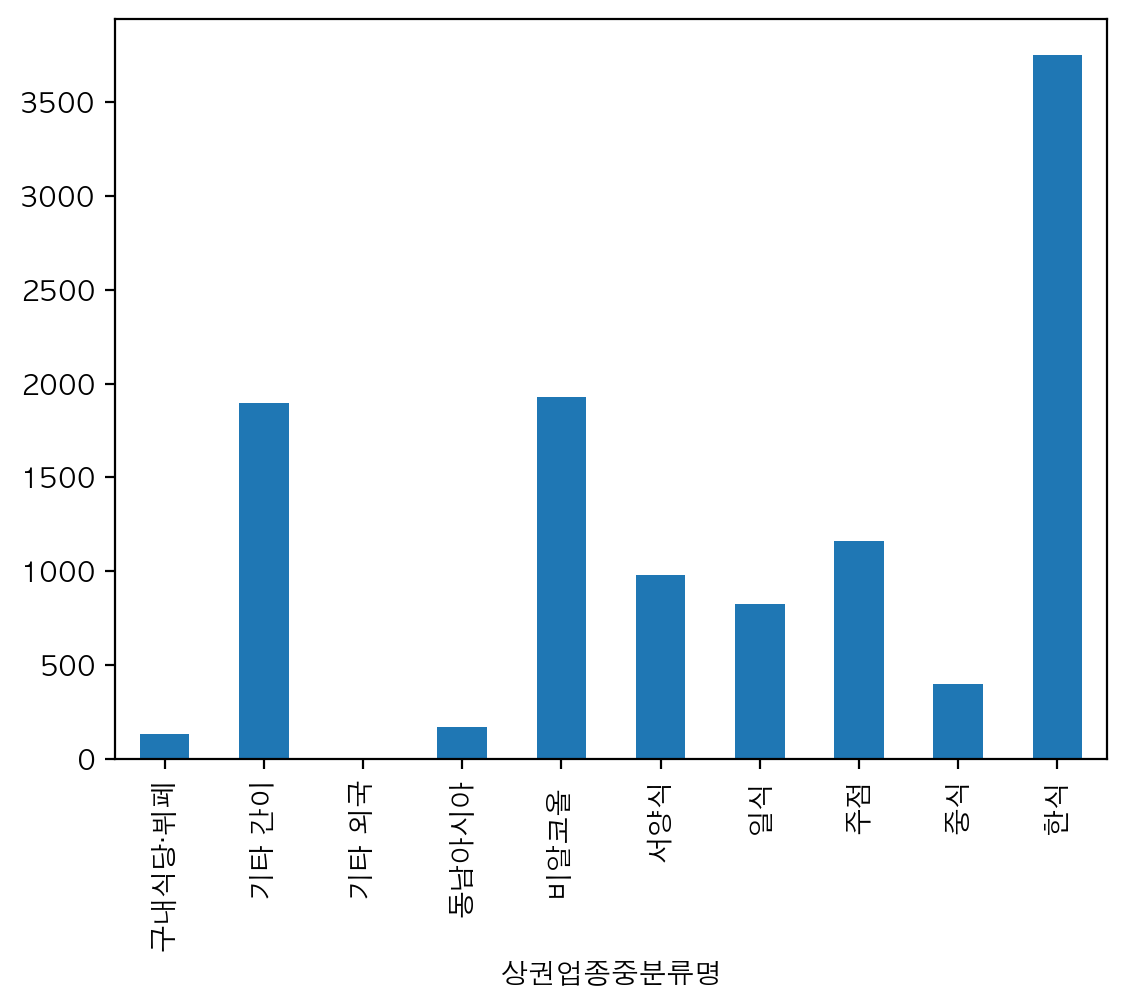

In [268]:
# food_gu 에 담긴 데이터를 시각화 합니다.
# 상권업종중분류명 과 상점수 로 barplot을 그립니다.
food_gu.unstack().loc['강남구'].plot.bar()

In [269]:
food = food_gu.reset_index()
food = food.rename(columns={'상호명':'상호수'})
food

시군구명 상권업종중분류명   상호수
0    강남구  구내식당·뷔페   131
1    강남구    기타 간이  1897
2    강남구    기타 외국     2
3    강남구    동남아시아   171
4    강남구    비알코올   1928
..   ...      ...   ...
235  중랑구      서양식    90
236  중랑구       일식   130
237  중랑구       주점   607
238  중랑구       중식   106
239  중랑구       한식  1584

[240 rows x 3 columns]

<Axes: xlabel='상권업종중분류명', ylabel='상호수'>

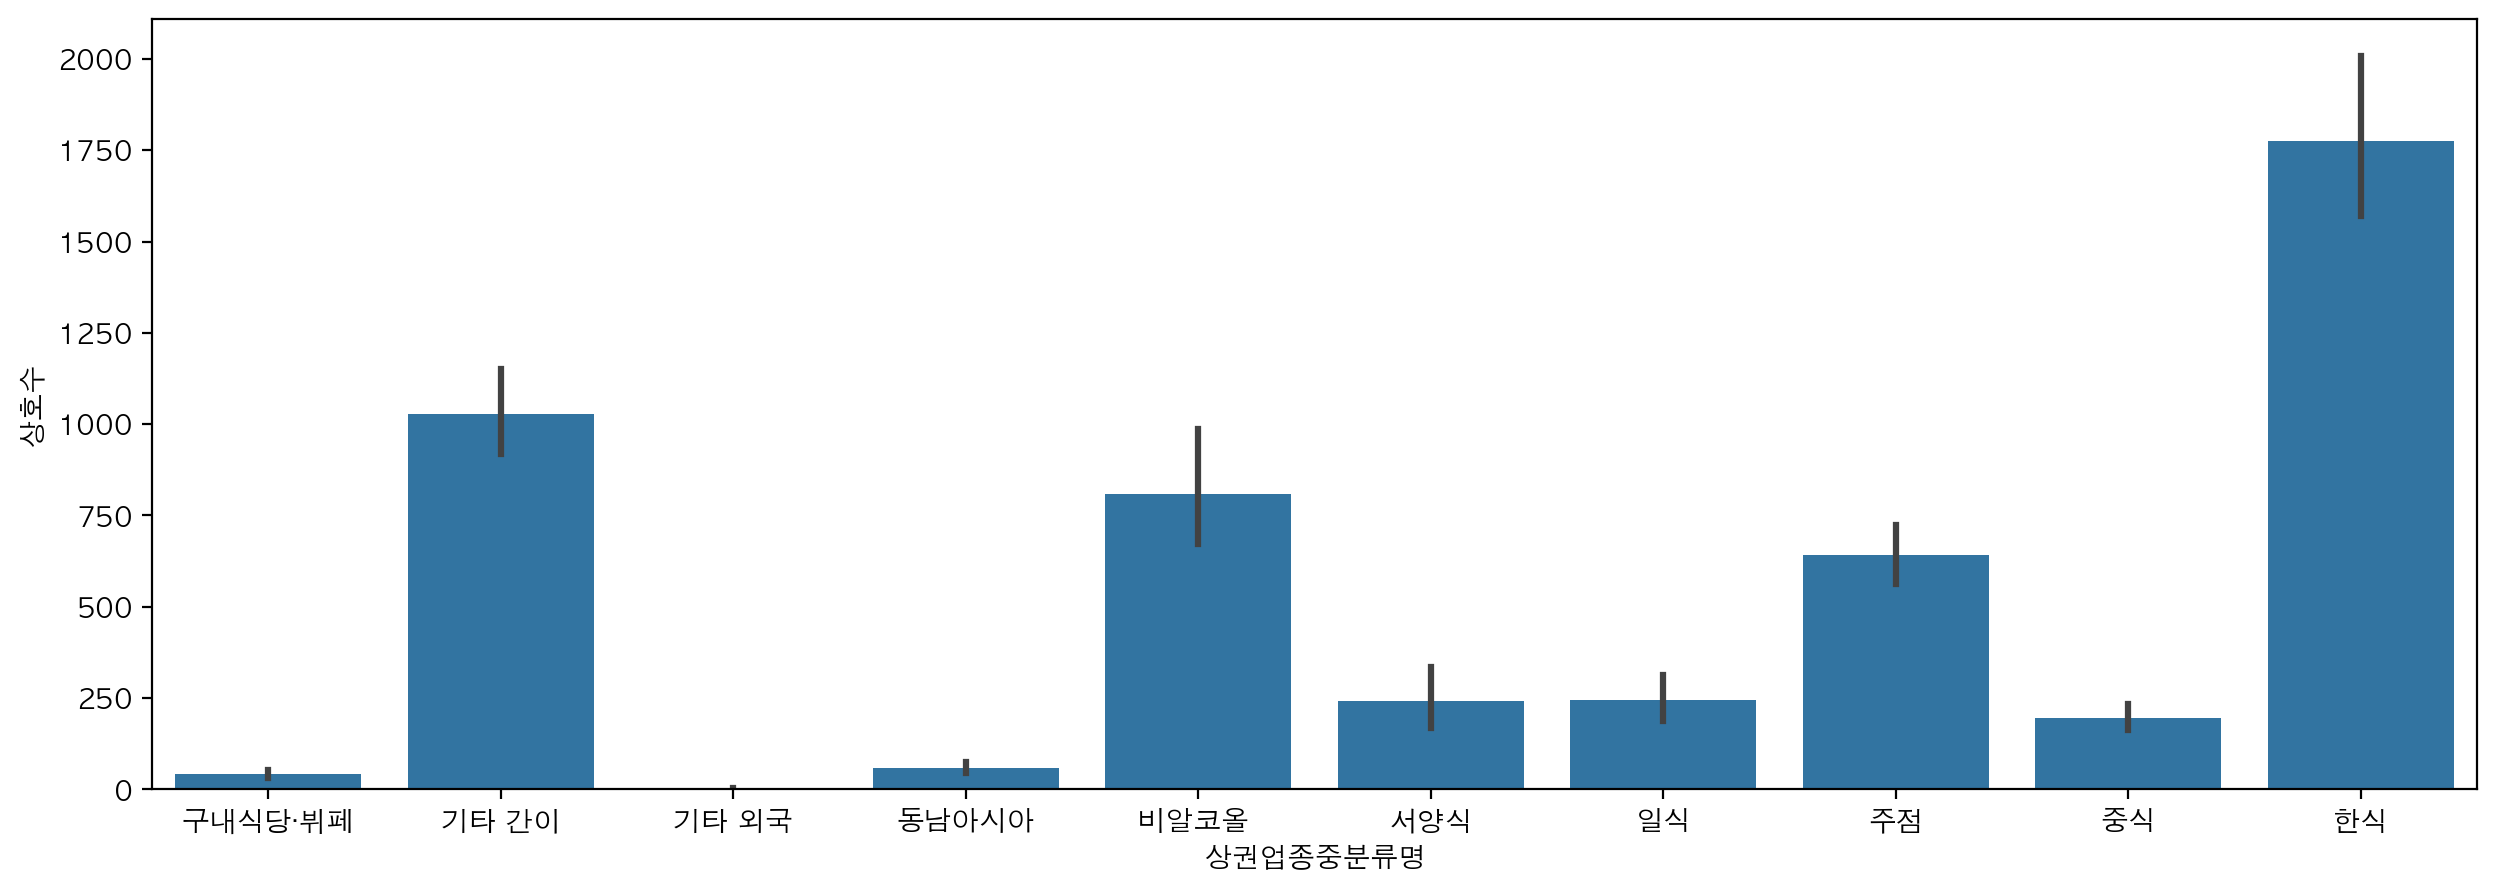

In [270]:
plt.figure(figsize=(15,5))
sns.barplot(
    data=food,
    x='상권업종중분류명',
    y='상호수',
)

- https://seaborn.pydata.org/tutorial/categorical.html


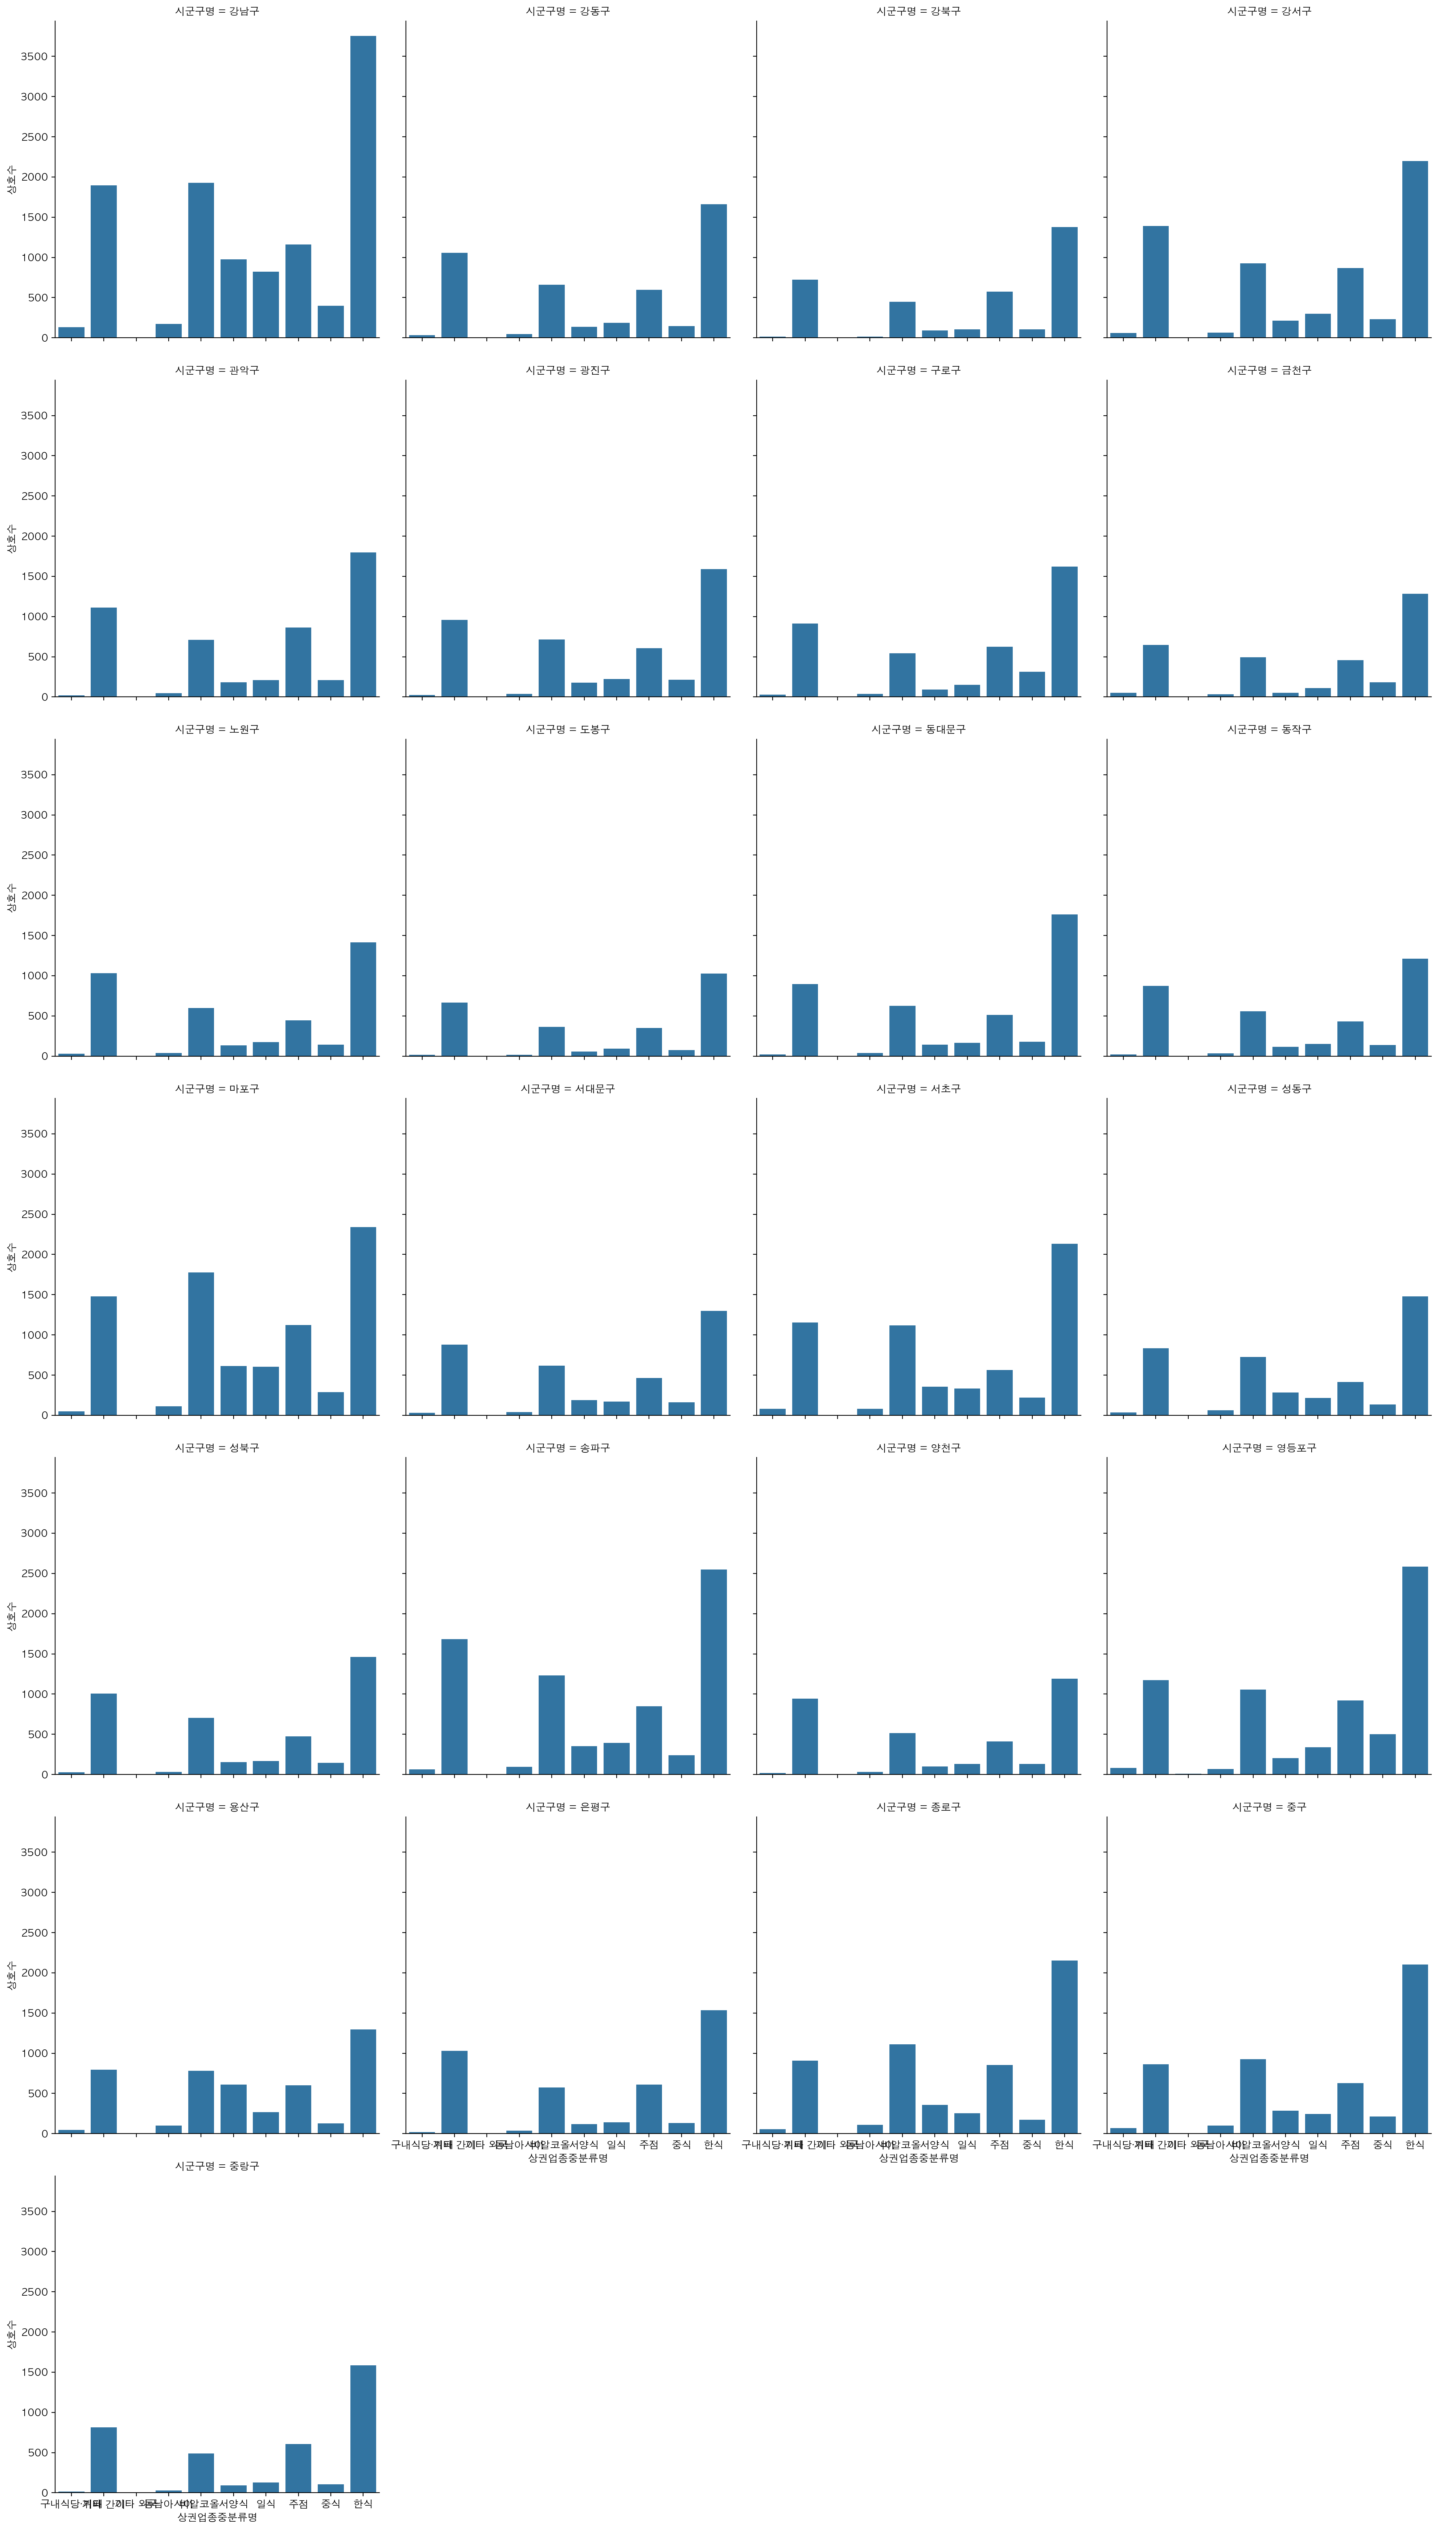

In [271]:
# catplot을 사용하여 서브프롯을 그립니다.
sns.catplot(
    data=food,
    x='상권업종중분류명',
    y='상호수',
    kind='bar',
    col='시군구명',
    col_wrap=4
)



## 구별 학원수 비교

- 주거나 입지로 문화시설이나 학원, 교육 등을 고려하게 됩니다.
- 사교육이 발달한 지역으로 대치동이나 목동을 꼽는데 이 지역에 학원이 많이 분포 되어 있는지 알아봅니다.


### 서브셋 만들고 집계하기


In [272]:
# 학원의 분류명을 알아보기 위해 "상권업종대분류명"의 unique 값을 추출합니다.
df['상권업종대분류명'].unique()


array(['음식', '숙박', '교육', '과학·기술', '소매', '시설관리·임대', '수리·개인', '부동산',
       '예술·스포츠', '보건의료'], dtype=object)

In [273]:
# "시도명"이 "서울특별시"이고 "상권업종대분류명"이 "학문/교육" 인 데이터를 서브셋으로 가져옵니다.
# 재사용을 위해 서브셋을 df_academy 에 저장합니다.
df_academy = df.loc[(df['시도명'] == '서울특별시') & (df['상권업종대분류명'] == '교육')].copy()
df_academy

상호명 상권업종대분류명 상권업종중분류명        상권업종소분류명    시도명 시군구명    행정동명 법정동명  \
2        나라차중계태권도장       교육    기타 교육        태권도/무술학원  서울특별시  노원구    중계본동  중계동   
11              볼벤       교육    기타 교육   기타 기술/직업 훈련학원  서울특별시  마포구    성산1동  성산동   
25           엑스퍼트짐       교육    기타 교육     레크리에이션 교육기관  서울특별시  은평구    응암3동  응암동   
37           율립연구소       교육    기타 교육      요가/필라테스 학원  서울특별시  송파구     위례동  장지동   
60              춤연       교육    기타 교육  기타 예술/스포츠 교육기관  서울특별시  서초구    양재1동  양재동   
...            ...      ...      ...             ...    ...  ...     ...  ...   
460397   클레프온음악교습소       교육    기타 교육            음악학원  서울특별시  성동구    행당1동  행당동   
460399      생동력연구소       교육    일반 교육         입시·교과학원  서울특별시  강남구    역삼1동  역삼동   
460410      예히세라믹스       교육    기타 교육   기타 기술/직업 훈련학원  서울특별시  강북구    수유3동  수유동   
460420   한국창조교육개발원       교육    일반 교육         입시·교과학원  서울특별시  서초구    양재2동  양재동   
460433  그릿뷰티아카데미학원       교육    기타 교육   기타 기술/직업 훈련학원  서울특별시  중랑구  면목3.8동  면목동   

       대지구분명  지번본번지                  지번주소                 도로명  건물본번지  \
2         대지    364  서울특별시 노원구 중계동 364-19     서울특별시 노원구 한글비석로  242.0   
11        대지    214  서울특별시 마포구 성산동 214-20  서울특별시 마포구 월드컵로30다길   41.0   
25        대지    119   서울특별시 은평구 응암동 119-1       서울특별시 은평구 응암로  269.0   
37        대지    881     서울특별시 송파구 장지동 881     서울특별시 송파구 위례광장로  188.0   
60        대지     89    서울특별시 서초구 양재동 89-4   서울특별시 서초구 양재천로29길    3.0   
...      ...    ...                   ...                 ...    ...   
460397    대지    380     서울특별시 성동구 행당동 380    서울특별시 성동구 고산자로2길   67.0   
460399    대지    831     서울특별시 강남구 역삼동 831      서울특별시 강남구 강남대로  354.0   
460410    대지    197  서울특별시 강북구 수유동 197-13      서울특별시 강북구 삼각산로  122.0   
460420    대지    215     서울특별시 서초구 양재동 215       서울특별시 서초구 매헌로   16.0   
460433    대지    472   서울특별시 중랑구 면목동 472-5      서울특별시 중랑구 사가정로  409.0   

                        도로명주소          경도         위도  
2         서울특별시 노원구 한글비석로 242  127.076956  37.649226  
11      서울특별시 마포구 월드컵로30다길 41  126.908665  37.562237  
25          서울특별시 은평구 응암로 269  126.918749  37.596001  
37        서울특별시 송파구 위례광장로 188  127.142381  37.481079  
60        서울특별시 서초구 양재천로29길 3  127.042226  37.479264  
...                       ...         ...        ...  
460397    서울특별시 성동구 고산자로2길 67  127.038026  37.556342  
460399     서울특별시 강남구 강남대로 354  127.029714  37.494642  
460410  서울특별시 강북구 삼각산로 122-11  127.017931  37.640298  
460420       서울특별시 서초구 매헌로 16  127.036935  37.462462  
460433     서울특별시 중랑구 사가정로 409  127.090213  37.580598  

[26011 rows x 16 columns]

In [274]:
# df_academy 에서 "상호명"으로 빈도수를 구합니다.
df_academy['상호명'].value_counts().head(10)


상호명
입시·교과학원        103
음악학원            16
모던필라테스          14
아메리카요가          12
필라테스            12
요가/필라테스 학원      11
고수의운전면허         10
에스바디워크필라테스      10
한우리독서토론논술       10
그 외 기타 교육기관      9
Name: count, dtype: int64

In [275]:
# "시군구명" 으로 빈도수를 구합니다.
df_academy['시군구명'].value_counts()


시군구명
강남구     4178
서초구     2499
송파구     1793
마포구     1644
강서구     1288
양천구     1247
영등포구    1066
강동구      939
노원구      893
관악구      869
광진구      811
은평구      801
성북구      793
종로구      776
서대문구     760
구로구      731
성동구      726
동작구      717
동대문구     613
용산구      576
금천구      505
중랑구      474
중구       447
도봉구      443
강북구      422
Name: count, dtype: int64

In [321]:
# "상권업종소분류명"으로 빈도수를 구하고 위에서 30개만 봅니다.
academy_count  = df_academy['상권업종소분류명'].value_counts()


In [322]:
# "상권업종소분류명"으로 빈도수를 구하고
# 빈도수가 1000개 이상인 데이터만 따로 봅니다.
academy_count_1000 = academy_count[academy_count > 1000]
academy_count_1000

상권업종소분류명
입시·교과학원          6660
요가/필라테스 학원       4219
기타 기술/직업 훈련학원    2490
기타 교육지원 서비스업     2285
그 외 기타 교육기관      1645
교육컨설팅업           1552
음악학원             1350
미술학원             1021
Name: count, dtype: int64

In [323]:
# "시군구명", "상권업종소분류명" 으로 그룹화를 하고 "상호명"으로 빈도수를 계산합니다.
academy_group = df_academy.groupby(['시군구명','상권업종소분류명'])['상호명'].count()
academy_group

시군구명  상권업종소분류명      
강남구   교육컨설팅업            384
      그 외 기타 교육기관       240
      기타 교육지원 서비스업      548
      기타 기술/직업 훈련학원     315
      기타 예술/스포츠 교육기관    128
                       ... 
중랑구   전문자격/고시학원           2
      직원 훈련기관            12
      청소년 수련시설            1
      컴퓨터 학원              2
      태권도/무술학원           24
Name: 상호명, Length: 448, dtype: int64

### seaborn으로 시각화 하기


In [324]:
t = academy_group.reset_index()
t = t.rename(columns={"상호명":"상호수"})
t.head()

시군구명        상권업종소분류명  상호수
0  강남구          교육컨설팅업  384
1  강남구     그 외 기타 교육기관  240
2  강남구    기타 교육지원 서비스업  548
3  강남구   기타 기술/직업 훈련학원  315
4  강남구  기타 예술/스포츠 교육기관  128

/var/folders/dn/kpsvhr056zz6gvcnmgrkklzr0000gn/T/ipykernel_77284/2941508606.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


<Axes: xlabel='시군구명', ylabel='상호수'>

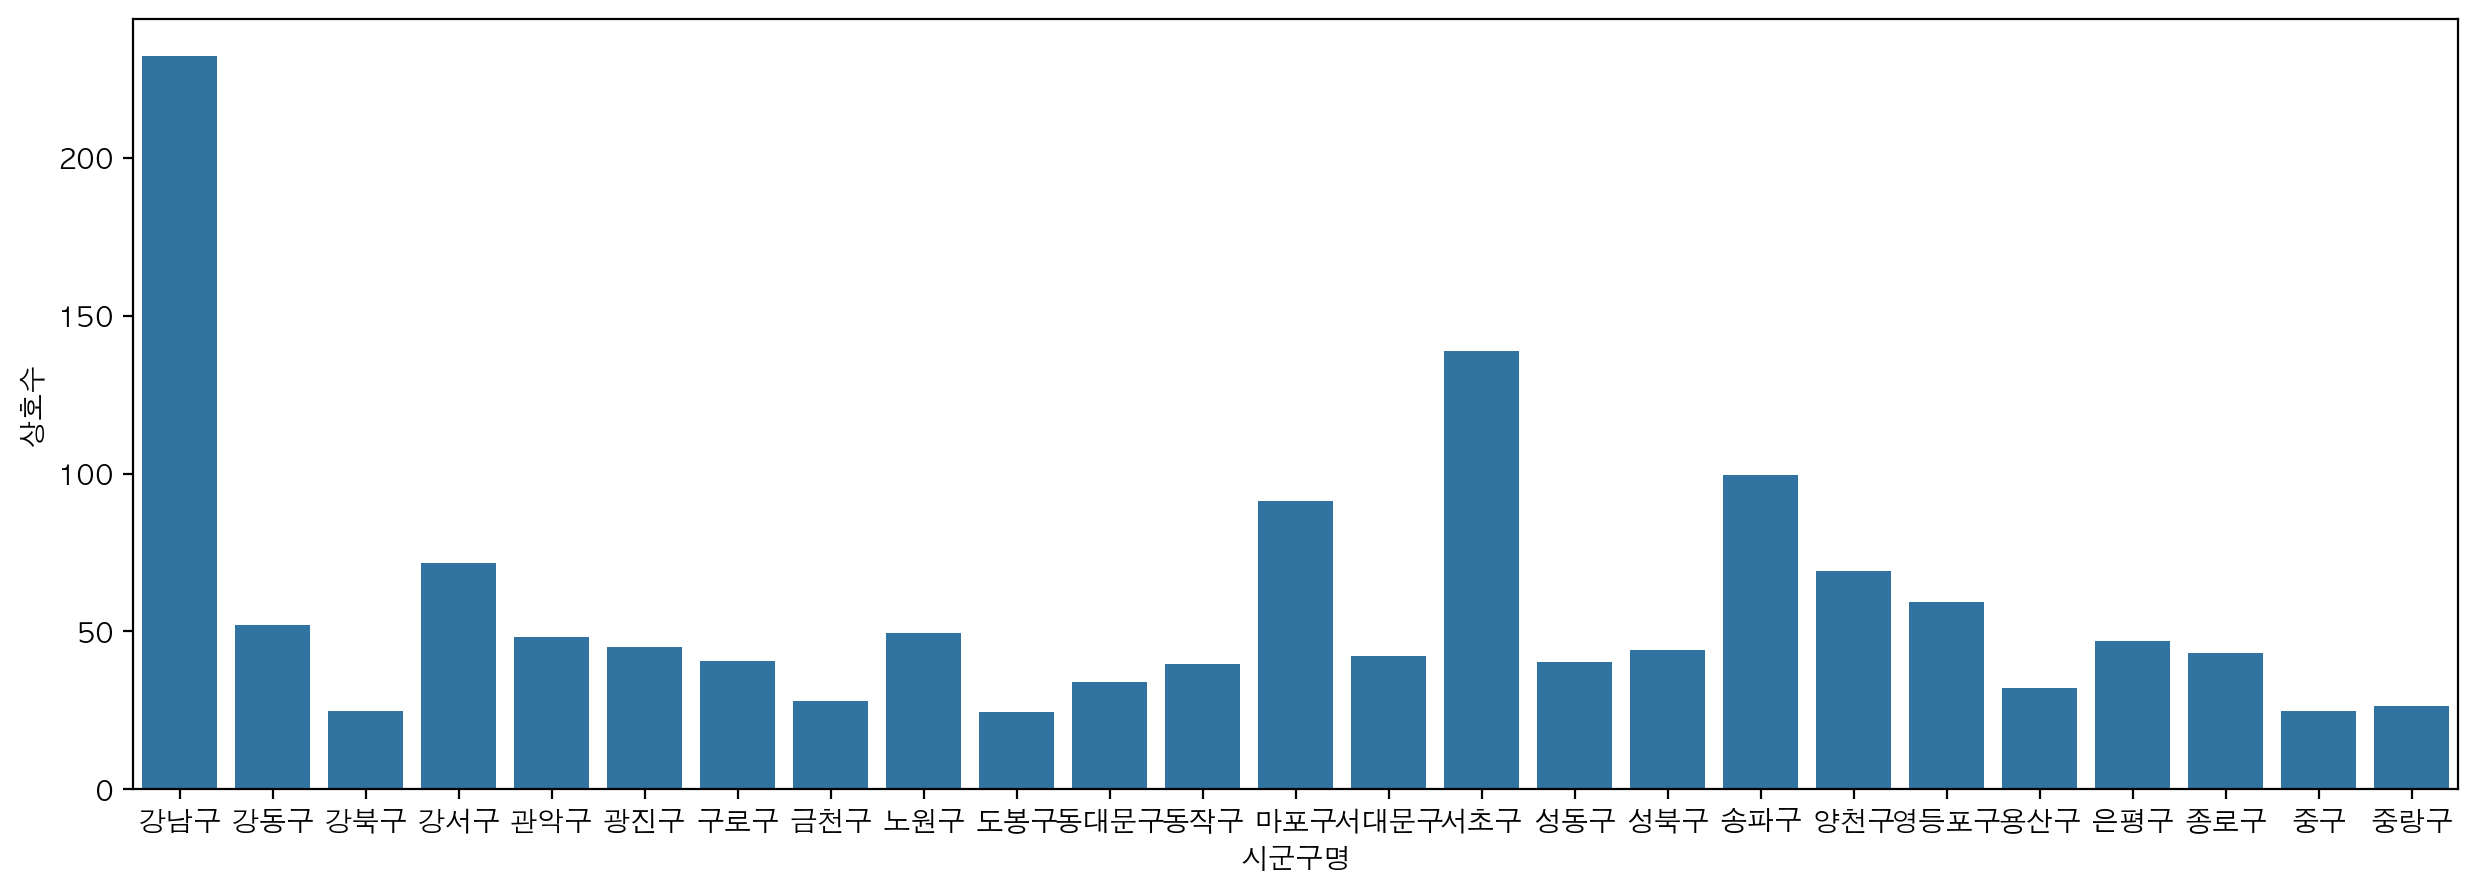

In [317]:
# 위에서 구한 결과를 시군구명, 상호수로 barplot을 그립니다.
plt.figure(figsize=(15,5))
sns.barplot(
    data=t,
    x = '시군구명',
    y='상호수',
    ci=None
)


### isin 을 사용해 서브셋 만들기

- 상권업종소분류명을 빈도수로 계산했을 때 1000개 이상인 데이터만 가져와서 봅니다.


In [320]:
academy_count_1000

(8,)

In [333]:
# isin 으로 빈도수로 계산했을 때 1000개 이상인 데이터만 가져와서 봅니다.
# 서브셋을 df_academy_selected 에 저장합니다. 
df_academy_selected = df_academy[df_academy['상권업종소분류명'].isin(academy_count_1000.index)]
df_academy_selected

상호명 상권업종대분류명 상권업종중분류명       상권업종소분류명    시도명 시군구명    행정동명  \
11                볼벤       교육    기타 교육  기타 기술/직업 훈련학원  서울특별시  마포구    성산1동   
37             율립연구소       교육    기타 교육     요가/필라테스 학원  서울특별시  송파구     위례동   
83           한국재무경영원       교육    교육 지원   기타 교육지원 서비스업  서울특별시   중구      필동   
115     메타인프렙입시컨설팅학원       교육    일반 교육        입시·교과학원  서울특별시  서초구    서초3동   
126           제이케이에듀       교육    기타 교육    그 외 기타 교육기관  서울특별시  노원구    상계2동   
...              ...      ...      ...            ...    ...  ...     ...   
460397     클레프온음악교습소       교육    기타 교육           음악학원  서울특별시  성동구    행당1동   
460399        생동력연구소       교육    일반 교육        입시·교과학원  서울특별시  강남구    역삼1동   
460410        예히세라믹스       교육    기타 교육  기타 기술/직업 훈련학원  서울특별시  강북구    수유3동   
460420     한국창조교육개발원       교육    일반 교육        입시·교과학원  서울특별시  서초구    양재2동   
460433    그릿뷰티아카데미학원       교육    기타 교육  기타 기술/직업 훈련학원  서울특별시  중랑구  면목3.8동   

        법정동명 대지구분명  지번본번지                  지번주소                 도로명  건물본번지  \
11       성산동    대지    214  서울특별시 마포구 성산동 214-20  서울특별시 마포구 월드컵로30다길   41.0   
37       장지동    대지    881     서울특별시 송파구 장지동 881     서울특별시 송파구 위례광장로  188.0   
83      필동3가    대지     21    서울특별시 중구 필동3가 21-7        서울특별시 중구 서애로   23.0   
115      서초동    대지   1542  서울특별시 서초구 서초동 1542-5   서울특별시 서초구 서초대로42길   12.0   
126      상계동    대지    603   서울특별시 노원구 상계동 603-2     서울특별시 노원구 상계로1길   24.0   
...      ...   ...    ...                   ...                 ...    ...   
460397   행당동    대지    380     서울특별시 성동구 행당동 380    서울특별시 성동구 고산자로2길   67.0   
460399   역삼동    대지    831     서울특별시 강남구 역삼동 831      서울특별시 강남구 강남대로  354.0   
460410   수유동    대지    197  서울특별시 강북구 수유동 197-13      서울특별시 강북구 삼각산로  122.0   
460420   양재동    대지    215     서울특별시 서초구 양재동 215       서울특별시 서초구 매헌로   16.0   
460433   면목동    대지    472   서울특별시 중랑구 면목동 472-5      서울특별시 중랑구 사가정로  409.0   

                        도로명주소          경도         위도  
11      서울특별시 마포구 월드컵로30다길 41  126.908665  37.562237  
37        서울특별시 송파구 위례광장로 188  127.142381  37.481079  
83            서울특별시 중구 서애로 23  126.997263  37.560202  
115      서울특별시 서초구 서초대로42길 12  127.008519  37.491412  
126        서울특별시 노원구 상계로1길 24  127.061682  37.657206  
...                       ...         ...        ...  
460397    서울특별시 성동구 고산자로2길 67  127.038026  37.556342  
460399     서울특별시 강남구 강남대로 354  127.029714  37.494642  
460410  서울특별시 강북구 삼각산로 122-11  127.017931  37.640298  
460420       서울특별시 서초구 매헌로 16  127.036935  37.462462  
460433     서울특별시 중랑구 사가정로 409  127.090213  37.580598  

[21222 rows x 16 columns]

In [334]:
df_academy_selected['상권업종소분류명'].value_counts()

상권업종소분류명
입시·교과학원          6660
요가/필라테스 학원       4219
기타 기술/직업 훈련학원    2490
기타 교육지원 서비스업     2285
그 외 기타 교육기관      1645
교육컨설팅업           1552
음악학원             1350
미술학원             1021
Name: count, dtype: int64

In [335]:
# df_academy_selected 의 "시군구명"으로 빈도수를 셉니다.
df_academy_selected['시군구명'].value_counts()


시군구명
강남구     3468
서초구     2056
송파구     1475
마포구     1289
강서구     1074
양천구     1069
영등포구     838
강동구      765
노원구      760
관악구      699
광진구      657
은평구      653
성북구      646
서대문구     640
종로구      613
구로구      579
성동구      579
동작구      557
동대문구     488
용산구      468
중랑구      391
금천구      384
도봉구      375
중구       357
강북구      342
Name: count, dtype: int64

In [338]:
df_academy_selected.loc[df_academy_selected['법정동명'] == '대치동','상권업종소분류명'].value_counts()

상권업종소분류명
입시·교과학원          679
교육컨설팅업            97
요가/필라테스 학원        75
기타 교육지원 서비스업      58
미술학원              47
그 외 기타 교육기관       34
기타 기술/직업 훈련학원     20
음악학원              11
Name: count, dtype: int64

In [339]:
df_academy_selected.loc[df_academy_selected['법정동명'] == '목동','상권업종소분류명'].value_counts()

상권업종소분류명
입시·교과학원          320
요가/필라테스 학원        76
음악학원              27
미술학원              26
기타 기술/직업 훈련학원     24
기타 교육지원 서비스업      21
교육컨설팅업            21
그 외 기타 교육기관       19
Name: count, dtype: int64

In [351]:
# df_academy_selected 로 위에서 했던 그룹화를 복습해 봅니다.
# "상권업종소분류명", "시군구명" 으로 그룹화를 하고 "상호명"으로 빈도수를 계산합니다.
# g 라는 변수에 담아 재사용 할 예정입니다.
g = df_academy_selected.groupby(['상권업종소분류명','시군구명'])['상호명'].count()
g

상권업종소분류명  시군구명
교육컨설팅업    강남구     384
          강동구      25
          강북구      14
          강서구      43
          관악구      44
                 ... 
입시·교과학원   용산구      71
          은평구     249
          종로구      70
          중구       36
          중랑구     114
Name: 상호명, Length: 200, dtype: int64

### Pandas 의 plot 으로 시각화


<Axes: ylabel='시군구명'>

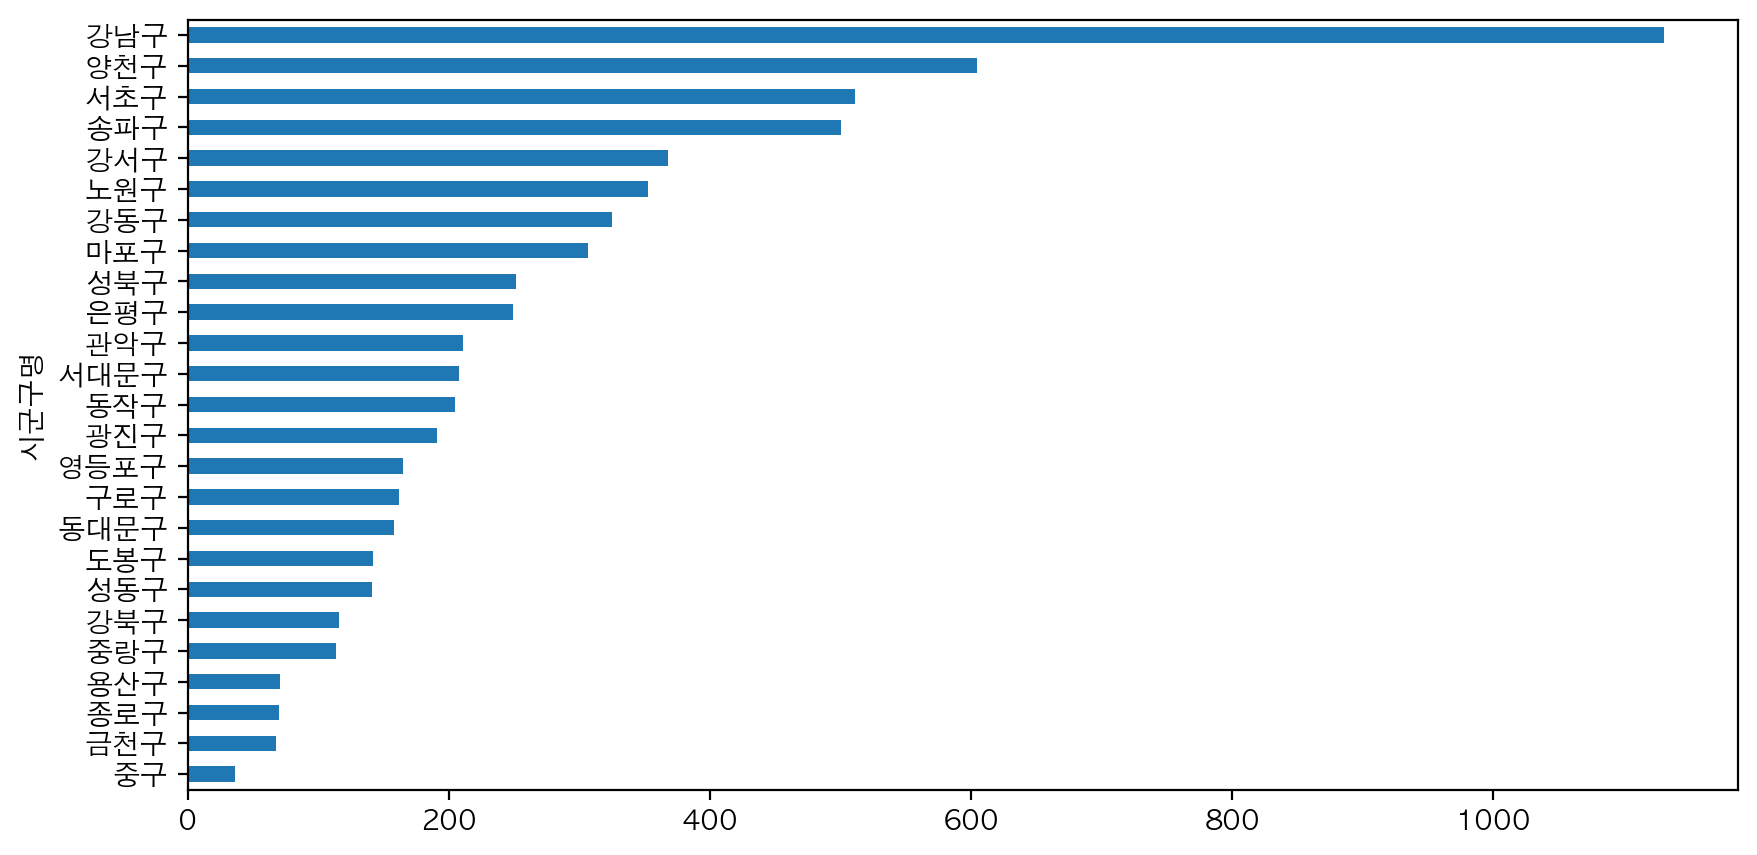

In [359]:
# 상권업종소분류명이 index 로 되어 있습니다.
# loc를 통해 index 값을 가져올 수 있습니다.
# 그룹화된 결과 중 "학원-입시" 데이터만 가져옵니다.
plt.figure(figsize=(10,5))
g.loc['입시·교과학원'].sort_values().plot.barh()

<Axes: xlabel='상권업종소분류명,시군구명'>

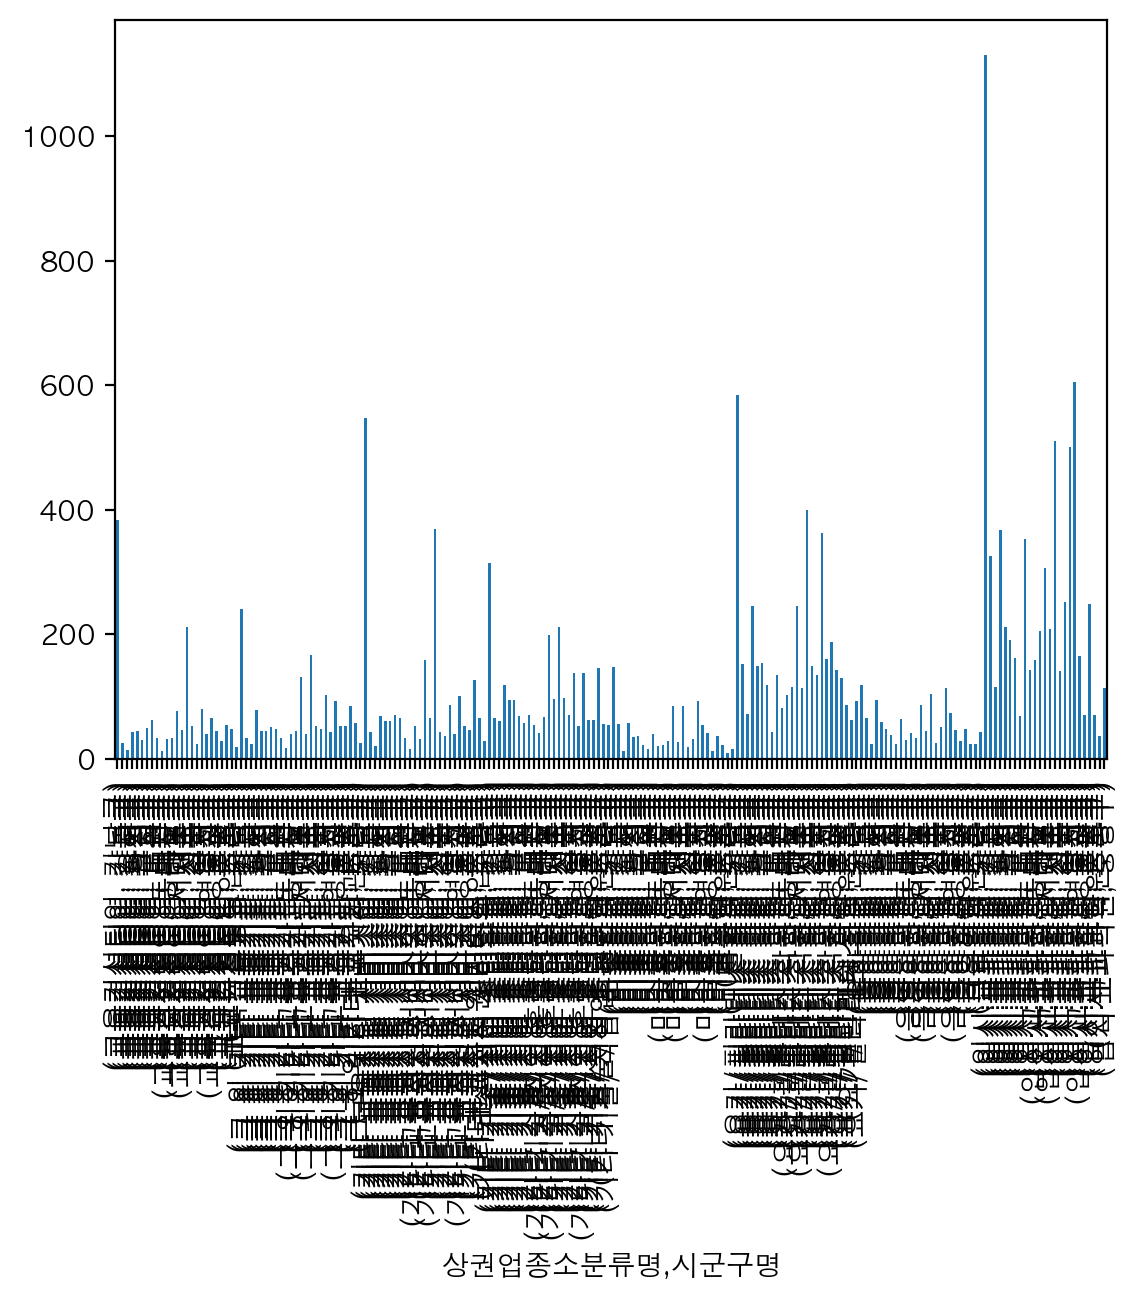

In [362]:
# 그룹화된 데이터를 시각화 하게 되면 멀티인덱스 값으로 표현이 되어 보기가 어렵습니다.
# 다음 셀부터 이 그래프를 개선해 봐요!
# g = g.reset_index().copy()
g.plot.bar()


### unstack() 이해하기

- https://pandas.pydata.org/docs/user_guide/reshaping.html
  <img src="https://pandas.pydata.org/docs/_images/reshaping_stack.png">
  <img src="https://pandas.pydata.org/docs/_images/reshaping_unstack.png">


In [373]:
# 위에서 그룹화한 데이터를 unstack() 하고 iloc로 위에서 5개 왼쪽에서 5개만 서브셋을 봅니다.
g.unstack().iloc[:5,:5]

시군구명           강남구  강동구  강북구  강서구  관악구
상권업종소분류명                              
교육컨설팅업         384   25   14   43   44
그 외 기타 교육기관    240   33   23   79   45
기타 교육지원 서비스업   548   43   21   69   61
기타 기술/직업 훈련학원  315   65   60  118   95
미술학원           147   56   13   57   35

<Axes: ylabel='시군구명'>

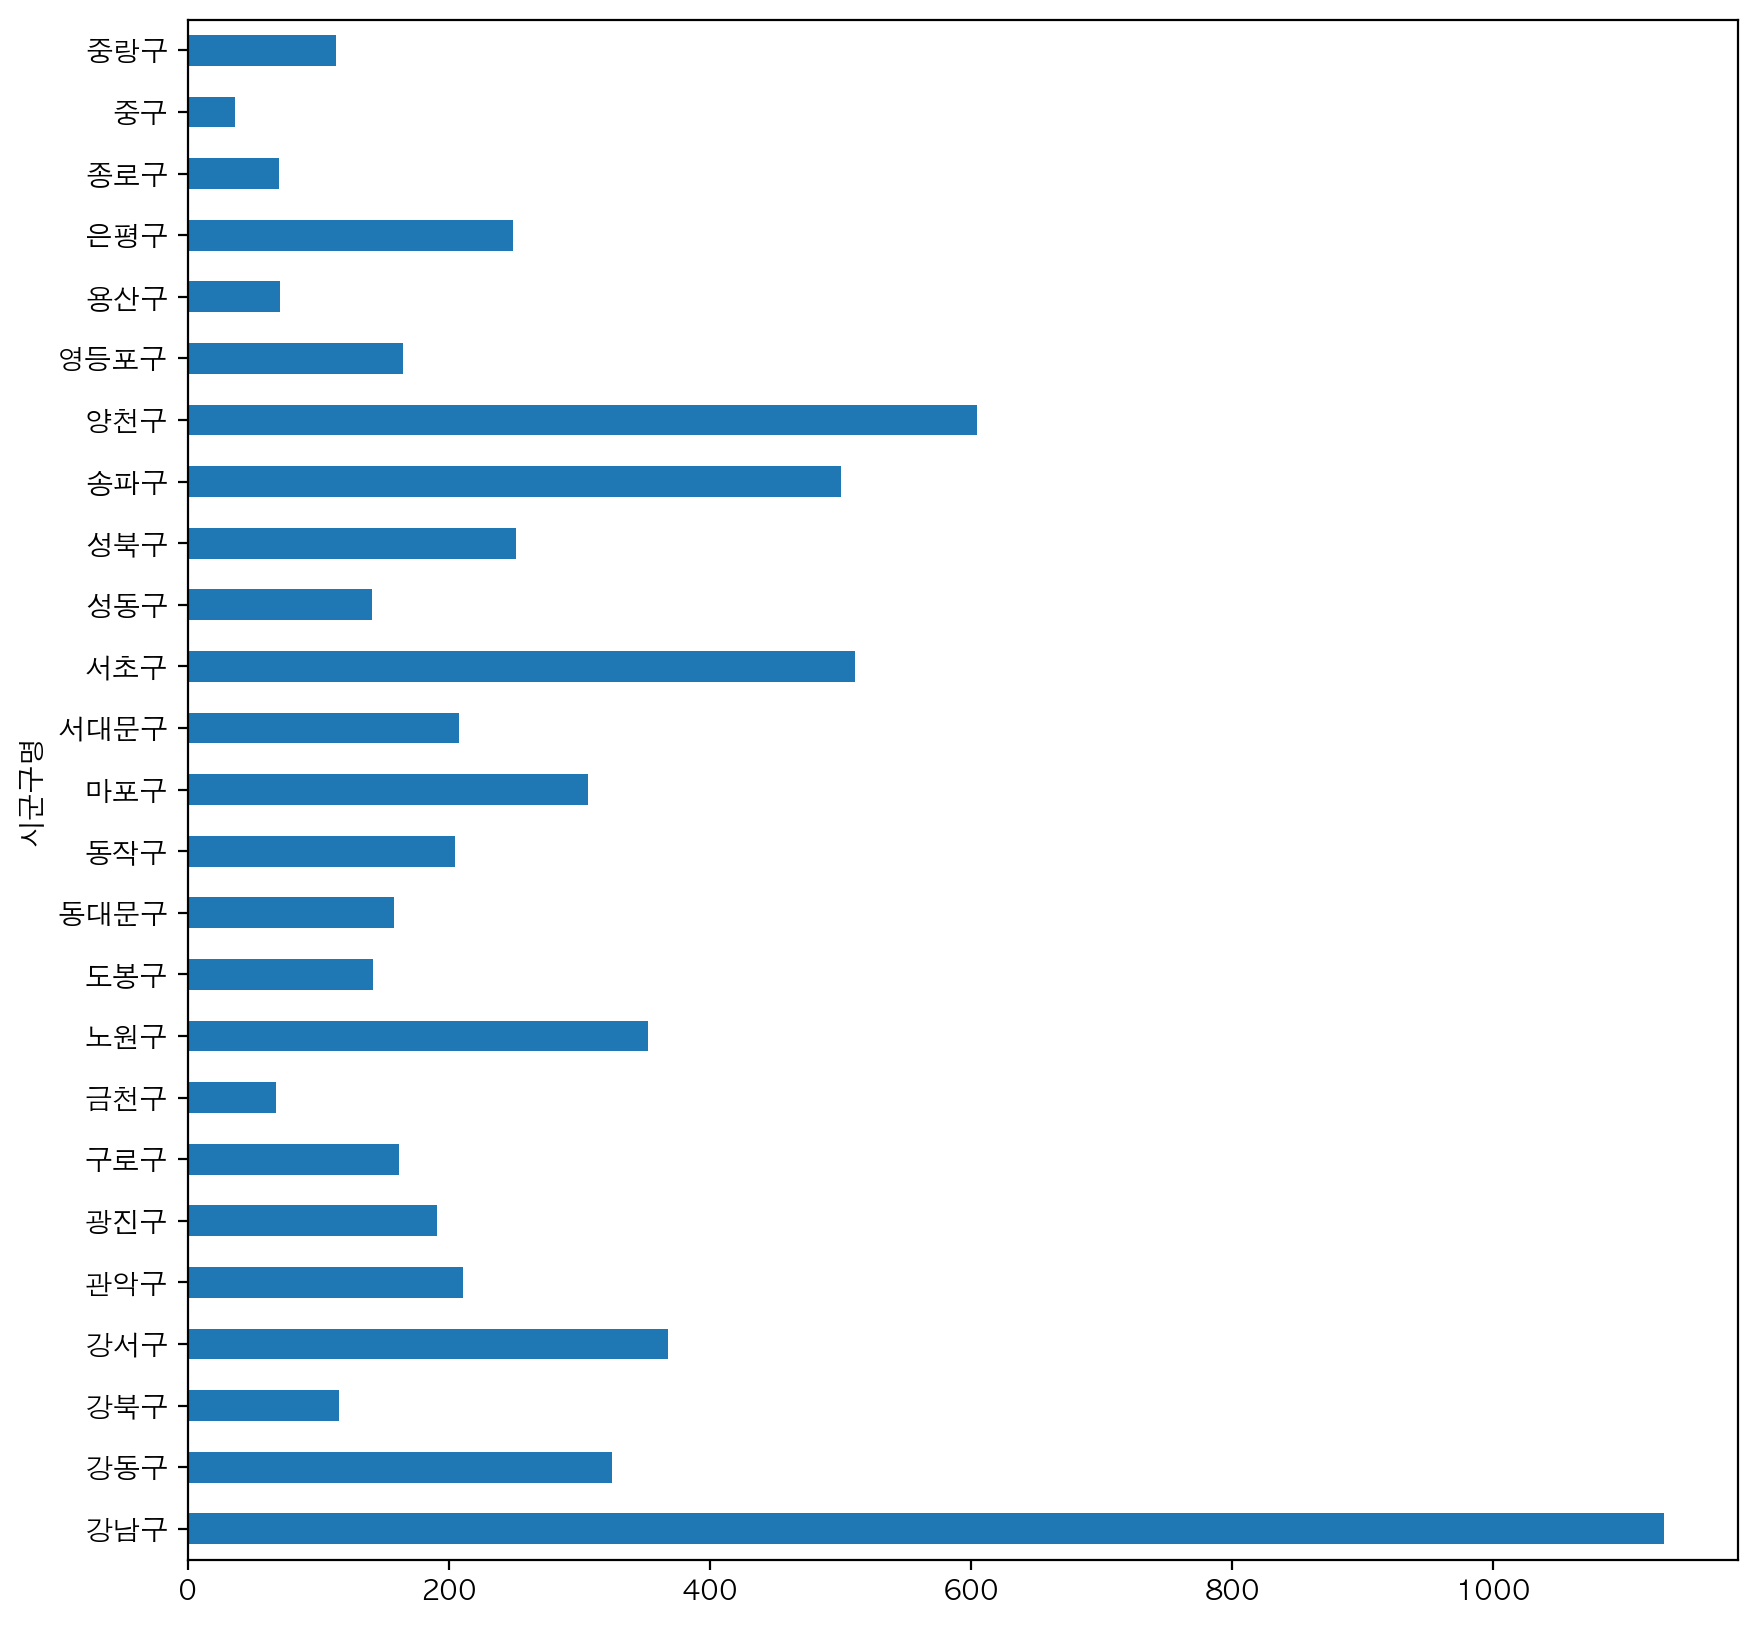

In [378]:
# 그룹화된 결과에 unstack 을 사용하면 마지막 인덱스 컬럼이 컬럼으로 바뀝니다.
g.unstack().loc['입시·교과학원'].plot.barh(figsize=(10,10))


<Axes: xlabel='시군구명'>

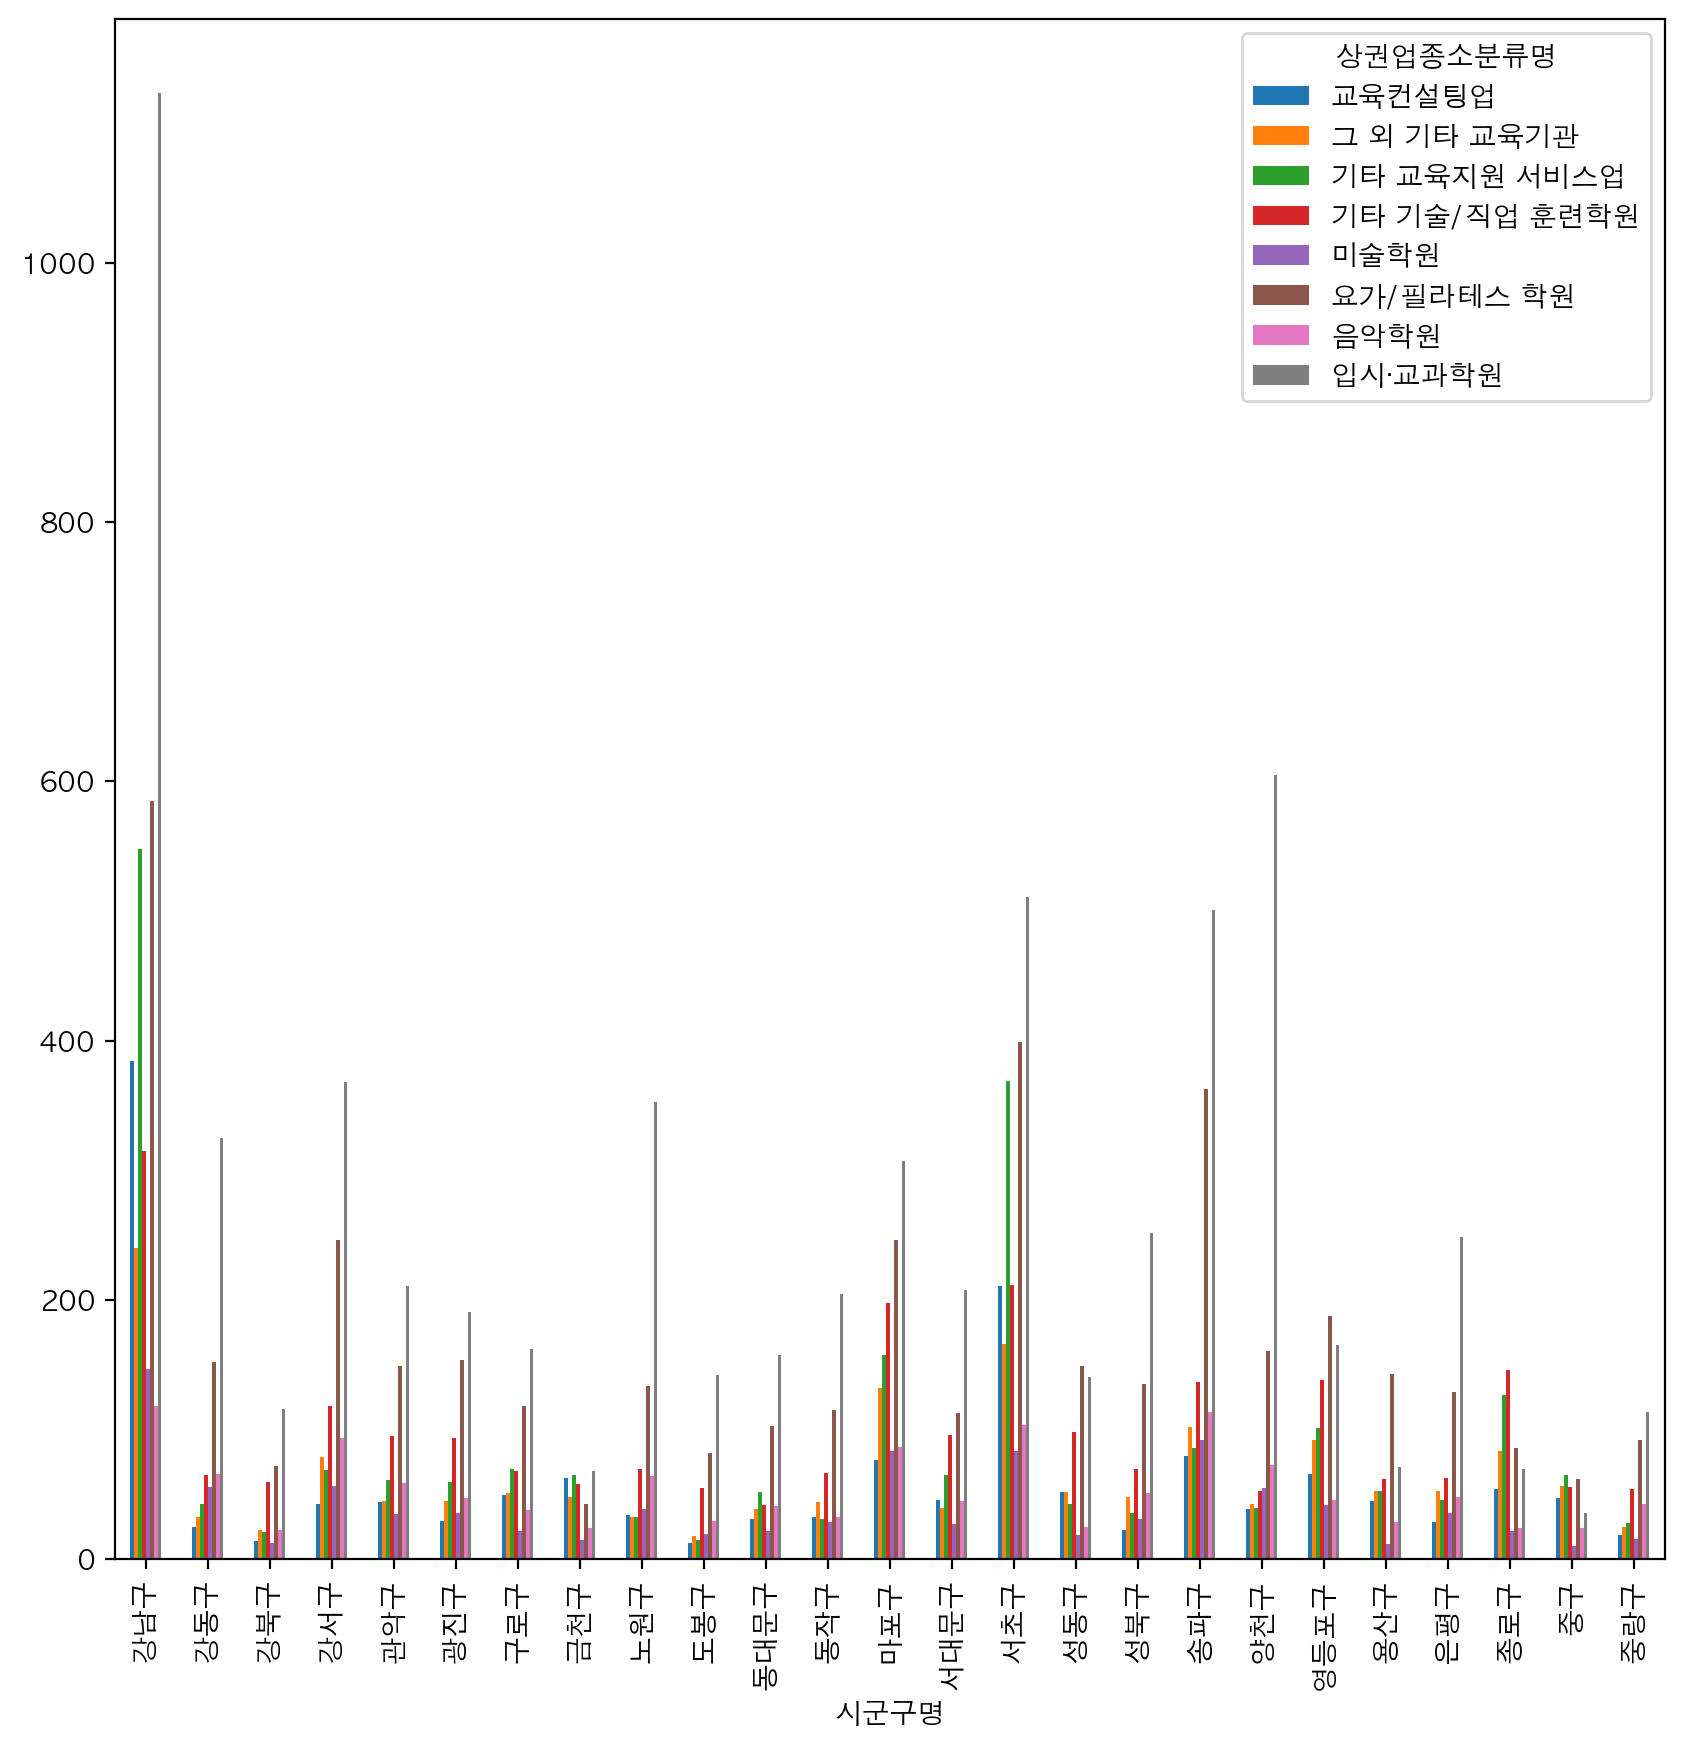

In [383]:
# 구별로 학원 수 시각화 하기 unstack() 값에 transpose 를 하면 행과 열이 바뀝니다.
g.unstack().T.plot.bar(figsize=(10,10))


In [384]:
# 그룹화 한 값의 인덱스를 출력해 봅니다.
g.index


MultiIndex([( '교육컨설팅업',  '강남구'),
            ( '교육컨설팅업',  '강동구'),
            ( '교육컨설팅업',  '강북구'),
            ( '교육컨설팅업',  '강서구'),
            ( '교육컨설팅업',  '관악구'),
            ( '교육컨설팅업',  '광진구'),
            ( '교육컨설팅업',  '구로구'),
            ( '교육컨설팅업',  '금천구'),
            ( '교육컨설팅업',  '노원구'),
            ( '교육컨설팅업',  '도봉구'),
            ...
            ('입시·교과학원',  '성동구'),
            ('입시·교과학원',  '성북구'),
            ('입시·교과학원',  '송파구'),
            ('입시·교과학원',  '양천구'),
            ('입시·교과학원', '영등포구'),
            ('입시·교과학원',  '용산구'),
            ('입시·교과학원',  '은평구'),
            ('입시·교과학원',  '종로구'),
            ('입시·교과학원',   '중구'),
            ('입시·교과학원',  '중랑구')],
           names=['상권업종소분류명', '시군구명'], length=200)

In [388]:
# 멀티인덱스보다 컬럼으로 접근이 편하기 때문에 reset_index 를 통해 인덱스값을 컬럼으로 만들어 줍니다.
# "상호명" 컬럼은 "상호수" 이기 때문에 컬럼명을 변경해 줍니다.
t = g.reset_index()
t = t.rename(columns={"상호명":"상호수"})
t

상권업종소분류명 시군구명  상호수
0     교육컨설팅업  강남구  384
1     교육컨설팅업  강동구   25
2     교육컨설팅업  강북구   14
3     교육컨설팅업  강서구   43
4     교육컨설팅업  관악구   44
..       ...  ...  ...
195  입시·교과학원  용산구   71
196  입시·교과학원  은평구  249
197  입시·교과학원  종로구   70
198  입시·교과학원   중구   36
199  입시·교과학원  중랑구  114

[200 rows x 3 columns]

### 같은 그래프를 seaborn 으로 그리기

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png">

이미지 출처 : https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html


In [291]:
# x축에 시군구명을 y축에 상호수를 막대그래프로 그립니다.
# 상권업종소분류명 으로 색상을 다르게 표현합니다.



In [292]:
# x축에 상권업종소분류명을 y축에 상호수를 막대그래프로 그립니다.
# 시군구명 으로 색상을 다르게 표현합니다.



In [293]:
# "상권업종소분류명"이 "학원-입시" 인 서브셋만 가져와서 시각화 합니다.



In [294]:
# catplot을 통해 서브플롯을 그립니다.



### 경도와 위도를 scatterplot 으로 표현하기


In [295]:
# scatterplot 으로 경도와 위도를 표현하고 시군구명으로 색상을 다르게 표현합니다.



In [296]:
# scatterplot 으로 경도와 위도를 표현하고 상권업종소분류명으로 색상을 다르게 표현합니다.



In [297]:
# "상권업종소분류명"이 "학원-입시" 인 데이터만 그려봅니다.


In [298]:
# "상권업종소분류명"이 "어린이집" 인 데이터만 그려봅니다.


In [299]:
# 어린이집과 학원-입시를 비교해 봅니다.



## Folium 으로 지도 활용하기

아나콘다를 설치하게 되면 자주 사용되는 패키지와 라이브러리가 함께 설치 됩니다.
아나콘다를 사용하지 않는다면 이런 라이브러리를 따로 설치하고 의존성있는 버전을 일일이 맞춰주어야 합니다.
아나콘다는 기본적으로 자주 사용되는 판다스, 넘파이, 사이킷런, 맷플롯립 등의 라이브러리를 내장하고 있습니다.
이에 비해 missingno, folium 등의 라이브러리는 아나콘다에 포함되어 있지 않습니다.
그래서 따로 설치를 해서 사용합니다.

- 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
  <img src="https://i.imgur.com/x7pzfCP.jpg">
- <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.

- 윈도우
  - <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
- 맥
  - terminal 프로그램을 열어 설치해 주세요.

검은색 프롬프트 창에 아래 명령어를 통해 folium 을 설치합니다.

`conda install -c conda-forge folium`

### Folium 사용예제

- 예제목록 : http://nbviewer.jupyter.org/github/python-visualization/folium/tree/main/examples/
- Quickstart : https://nbviewer.jupyter.org/github/python-visualization/folium/blob/main/examples/Quickstart.ipynb


In [300]:
# 위에서 그렸던 어린이집과 학원-입시에 대한 상호 데이터를 지도에 시각화 해봅니다.


In [301]:
# 경도와 위도의 평균을 구해서 long, lat 변수에 담습니다.



In [302]:
# "상권업종소분류명"에 "어린이집", "학원-입시"가 들어가는 데이터만 isin을 통해 가져옵니다.



In [303]:
# folium 으로 Marker 를 지도로 표시해 봅니다.



In [304]:
# html 파일로 저장해 봅니다.


In [305]:
# loc를 통해 특정 상호명을 접근해 봅니다.



In [306]:
# index 만 가져옵니다.



In [307]:
# for문으로 데이터프레임을 순회하며 원하는 값을 가져옵니다.



In [308]:
# 위에서 작성해본 for문을 활용해 CircleMarker 로 표현해 봅니다.

